# Predict individuals' likelihood of intermarriage based on demographic characteristics and social networks.

## Using CRISP-DM, or Cross-Industry Standard Process for Data Mining

# 1. Business Understanding

## 1.0 Project Objectives

### Primary Goal:

1. Develop a Predictive Model: Create a model to predict the likelihood of intermarriage based primarily on demographic characteristics. This model aims to identify which demographic factors are most influential in determining intermarriage scenarios.
2. Perform descriptive analysis to understand the underlying trends and characteristics of intermarriage within the dataset. This involves summarizing demographic features, identifying common patterns, and presenting these findings to provide a comprehensive overview of intermarriage dynamics.

### Secondary Goals:

1. Identify Demographic Patterns: Analyze demographic data to determine patterns that significantly influence the probability of intermarriage. This includes examining factors such as age, birthplace, education, occupation, and economic status.

2. Explore Demographic Differences: Investigate how different demographic groups (e.g., based on gender, birth location, or educational background) vary in their propensity for intermarriage.

## 1.1 Specific Questions

### Predictive Analysis Questions and Techniques:

1. How do combined demographic characteristics such as age, education, and birth location interact to influence the likelihood of intermarriage?

Techniques: models like decision trees or neural networks


2. Can cluster analysis identify distinct demographic profiles that are more likely to participate in intermarriage, and how do these profiles vary by geographic region?

Techniques: cluster analysis and logistic regression or other classifiers

### Descriptive Analysis Questions and Techniques:

1. What is the longitudinal trend in intermarriage rates over decades among different demographic groups, and how have socioeconomic factors influenced these trends?

Techniques: Perform time-series analysis and use descriptive statistics to explore and visualize trends over time.

## 1.2 Purpose

### Academic Relevance:
This project will support university researchers in their efforts to publish a paper on the social dynamics of aristocrats, offering empirical data and insights that deepen the academic understanding of demographic influences on aristocratic behaviors and choices.

### Professional Development:
Professionally, this project will sharpen my data analysis and modeling skills, improving my proficiency with advanced statistical methods and predictive modeling. Completing this project will enhance my career prospects in data science, particularly in roles involving demographic analytics or social research.

## 1.3 Previous Research

### Nipun Kularathne's Research:
Kularathne's dissertation leverages network analysis and graph theory to uncover the entrenched connections and inherited privileges within British elite circles. Utilizing network graphs and centrality metrics, his research meticulously illustrates how familial ties and institutional affiliations have solidified elite statuses through history. This methodological approach not only elucidates the durability of these networks but also their complex structures within the fabric of British history.



### Zoya Tasawar's Research:
Tasawar transformed raw textual data into a structured format that facilitated comprehensive network analysis, focusing on the dynamics of kinship and parental influence among British elites. Through the deployment of interactive network graphs and advanced visualization tools, her research sheds light on how family networks have perpetuated elite statuses across generations. Her analytical techniques provide a nuanced understanding of the interplay between familial structures and societal influence throughout British history.

# 2. Data Understanding

## 2.0 Data Collection 

### Source Confirmation:
The dataset used for this analysis was provided by university researchers, initially formatted in XML. To facilitate ease of analysis and compatibility with analytical tools, this XML data was converted into an Excel file format. This conversion ensures that the data can be readily accessed and manipulated using standard data analysis software, enhancing the efficiency of subsequent data processing and analysis phases.

### Data Acquisition:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

In [2]:

file_path = 'Final_Dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

print(df.head())


  Gender MainName       foreNames       Birth Birth Place - Town  \
0      f  Brayton            Lily  1876-06-23            Hindley   
1      f  Collier       Constance  1878-01-22        New Windsor   
2      m    Close          Dennis  1931-02-24             Rawdon   
3      m   Barham  Richard Harris  1788-12-06         Canterbury   
4      m   Barham   Thomas Foster  1794-09-10             Hendon   

  Birth Place - City      Birth Place - County Birth Place - Country  \
0                NaN                Lancashire               England   
1                NaN                 Berkshire               England   
2                NaN  West Riding of Yorkshire               England   
3                NaN                      Kent               England   
4                NaN                 Middlesex               England   

        Death    Death Place - Town  ... School_2_City School_2_Country  \
0  1953-04-30               Dawlish  ...           NaN              NaN   
1  1955-

C:\Users\Muneeb Nabeel\AppData\Local\Temp\ipykernel_6820\2780945211.py:4: DtypeWarning: Columns (5,10,21,24,29,31,32,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


## 2.1 Data Exploration

In [3]:
# Initial Examination
print("Initial Data Examination:")
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print("\nData Types and Role of Each Column:")
print(df.info())

Initial Data Examination:
Number of Rows: 39517
Number of Columns: 47

Data Types and Role of Each Column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39517 entries, 0 to 39516
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 37485 non-null  object 
 1   MainName               38223 non-null  object 
 2   foreNames              36425 non-null  object 
 3   Birth                  28436 non-null  object 
 4   Birth Place - Town     22019 non-null  object 
 5   Birth Place - City     331 non-null    object 
 6   Birth Place - County   24381 non-null  object 
 7   Birth Place - Country  26602 non-null  object 
 8   Death                  34189 non-null  object 
 9   Death Place - Town     24226 non-null  object 
 10  Death Place - City     290 non-null    object 
 11  Death Place - County   26749 non-null  object 
 12  Death Place - Country  29200 non-null  object 
 13 

In [4]:
# Data Summarization for Numerical Data
print("\nSummary Statistics for Numerical Data:")
print(df.describe())



Summary Statistics for Numerical Data:
       No_of_Spouse  No_of_Schools    Birth_Year    Death_Year           Age
count  39517.000000   39517.000000  24198.000000  28384.000000  23924.000000
mean       0.823468       0.325126   1832.091991   1881.294215     70.965056
std        0.786542       0.468482     64.701404     86.401221     15.577719
min        0.000000       0.000000   1677.000000   1677.000000      0.000000
25%        0.000000       0.000000   1788.000000   1827.000000     62.000000
50%        1.000000       0.000000   1831.000000   1885.000000     73.000000
75%        1.000000       1.000000   1887.000000   1952.000000     82.000000
max       11.000000       2.000000   1990.000000   2015.000000    226.000000


In [5]:
# display unique counts and mode for each categorical column
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    print("Unique Values Count:", df[col].nunique())
    print("Mode:", df[col].mode().values[0])


Column: Gender
Unique Values Count: 3
Mode: m

Column: MainName
Unique Values Count: 13861
Mode: Smith

Column: foreNames
Unique Values Count: 12524
Mode: John

Column: Birth
Unique Values Count: 19553
Mode: 1800

Column: Birth Place - Town
Unique Values Count: 7118
Mode: Edinburgh

Column: Birth Place - City
Unique Values Count: 151
Mode: London

Column: Birth Place - County
Unique Values Count: 637
Mode: London

Column: Birth Place - Country
Unique Values Count: 239
Mode: England

Column: Death
Unique Values Count: 28060
Mode: 1780

Column: Death Place - Town
Unique Values Count: 6174
Mode: Edinburgh

Column: Death Place - City
Unique Values Count: 120
Mode: London

Column: Death Place - County
Unique Values Count: 639
Mode: London

Column: Death Place - Country
Unique Values Count: 262
Mode: England

Column: Occupation
Unique Values Count: 13562
Mode: army officer

Column: Alternative Names
Unique Values Count: 12814
Mode: Jack

Column: Father_MainName
Unique Values Count: 11178
Mo

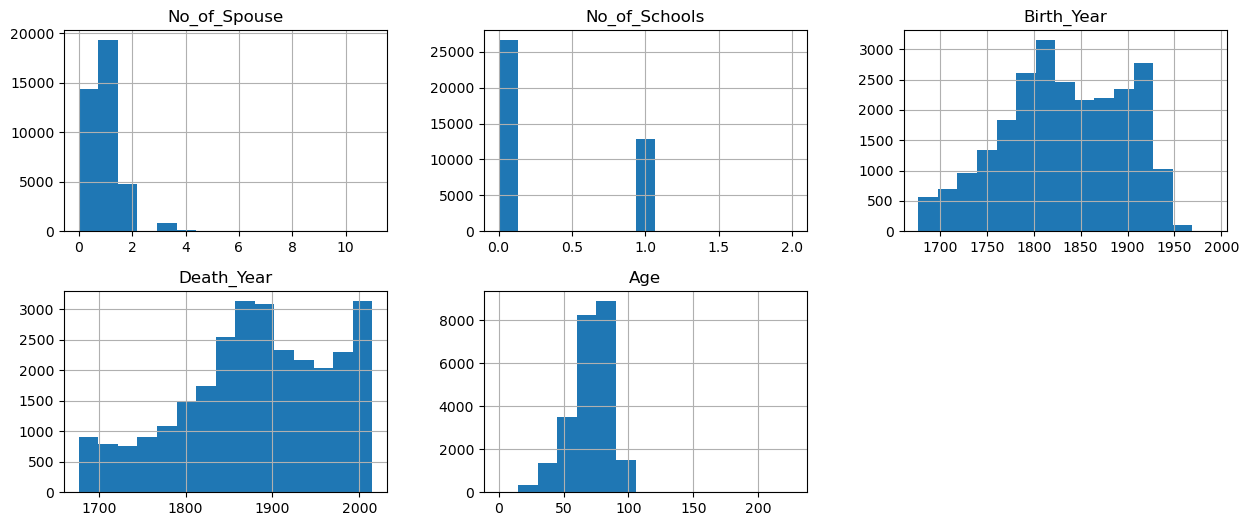

In [6]:
# Histograms for numerical data
num_columns = df.select_dtypes(include=np.number).columns.tolist()
df[num_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()


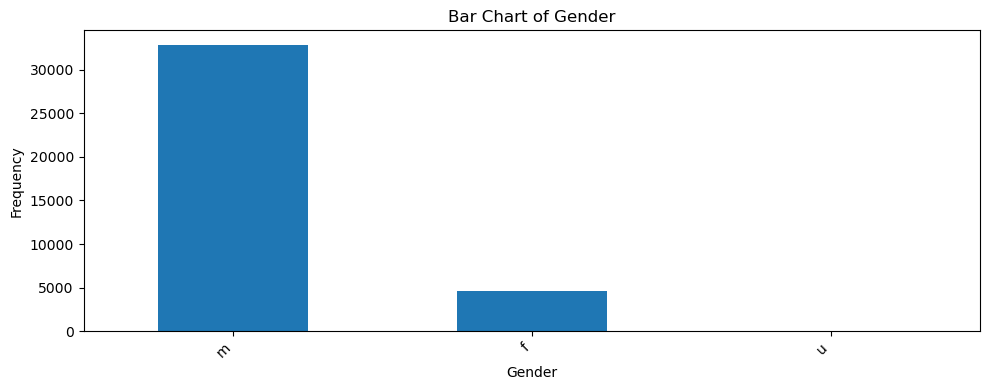

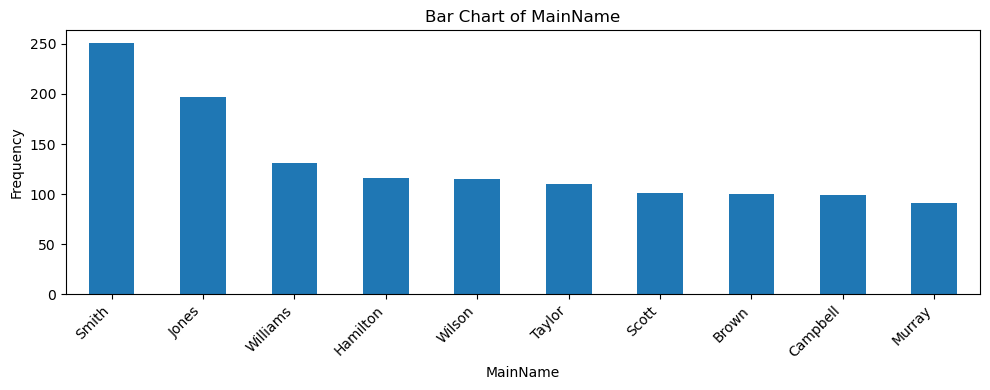

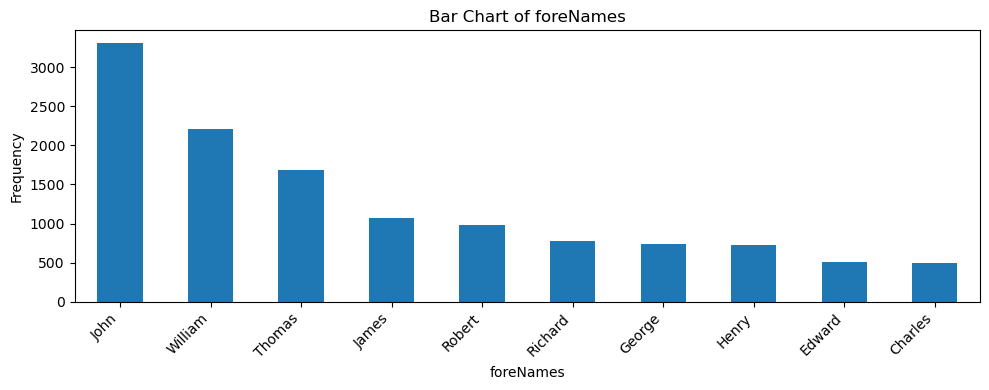

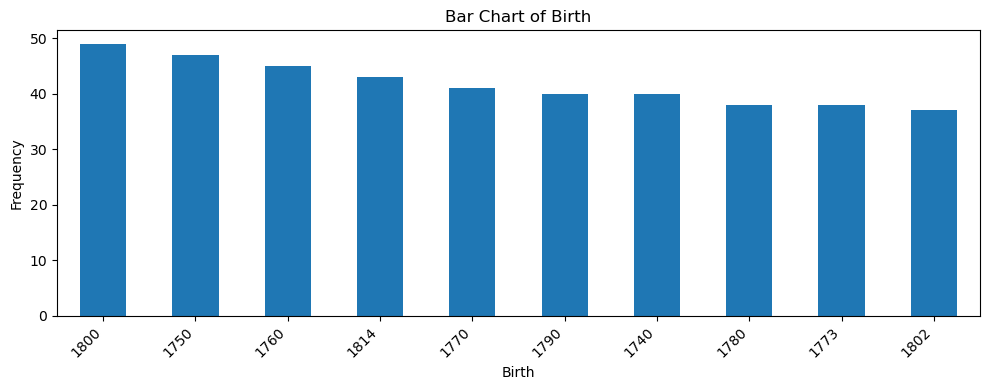

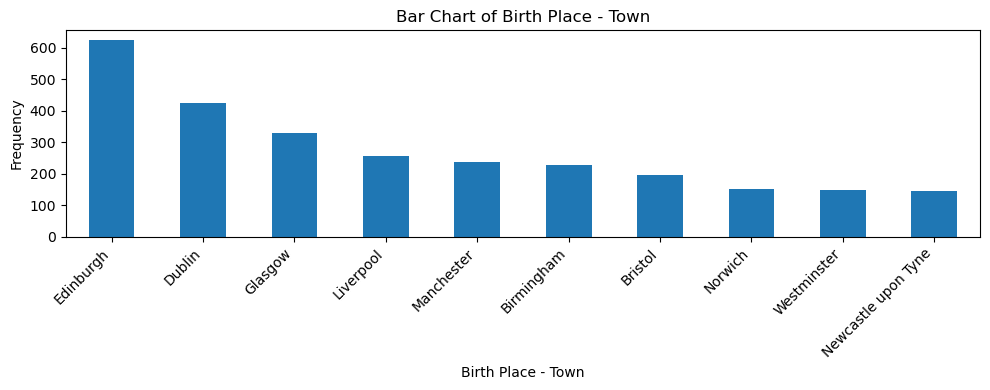

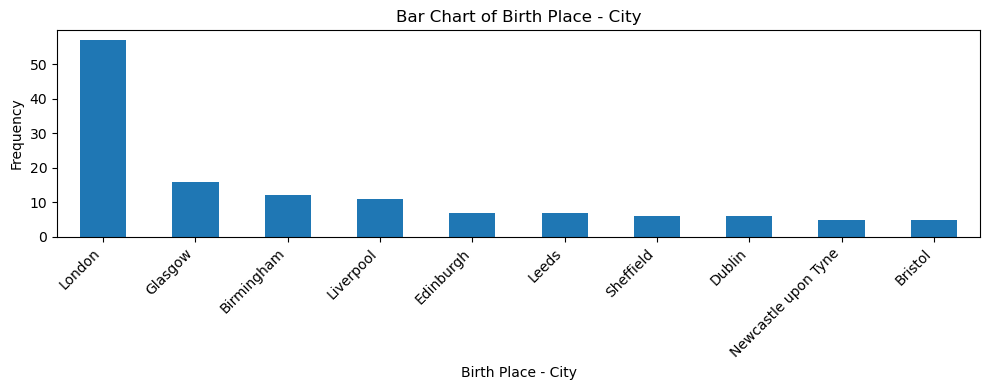

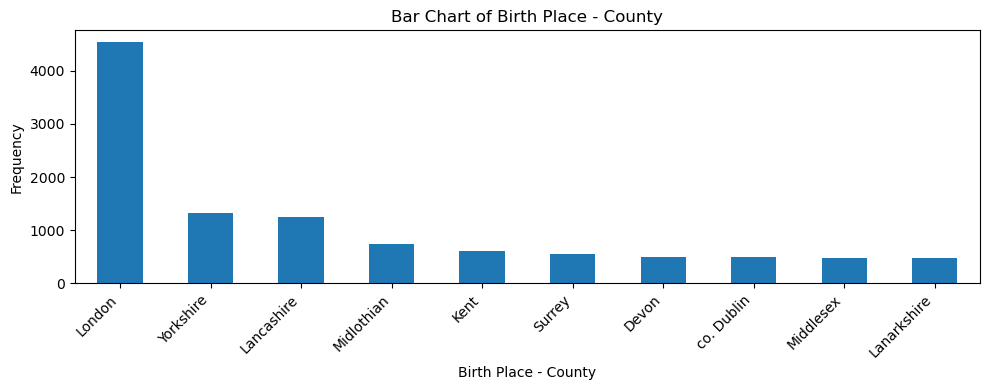

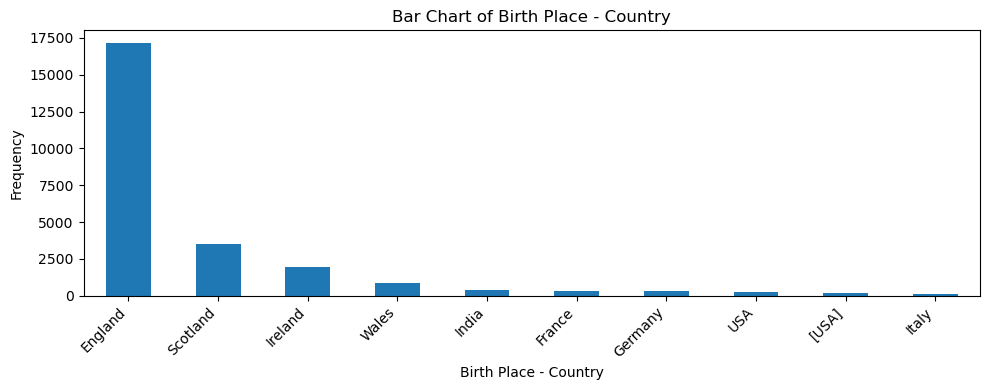

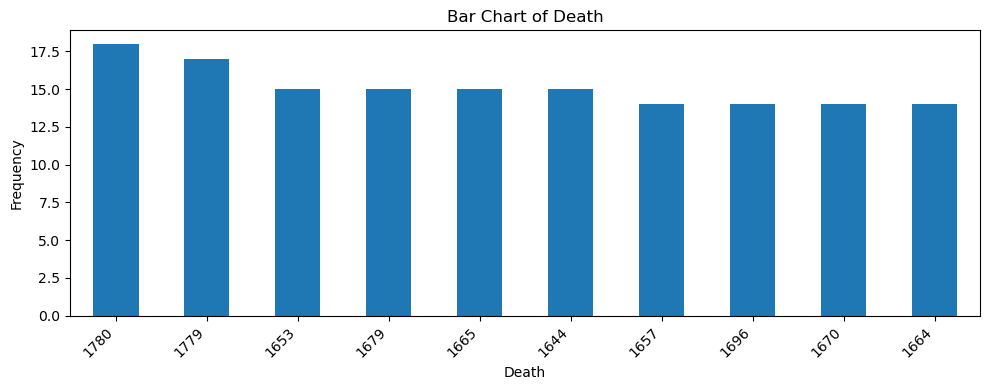

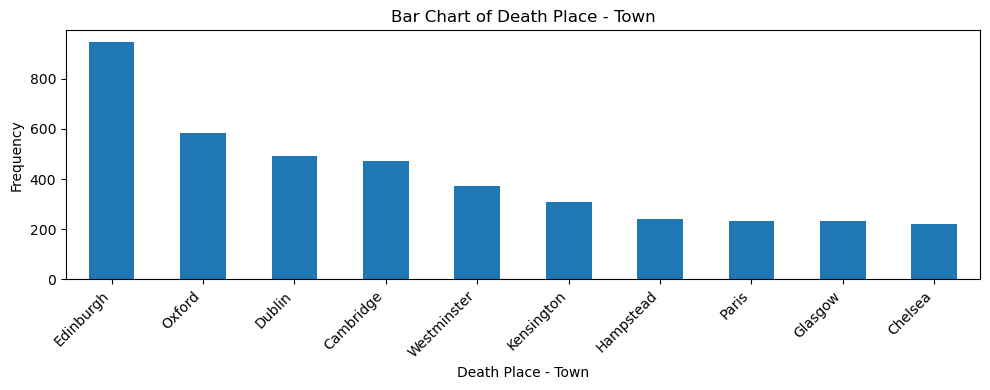

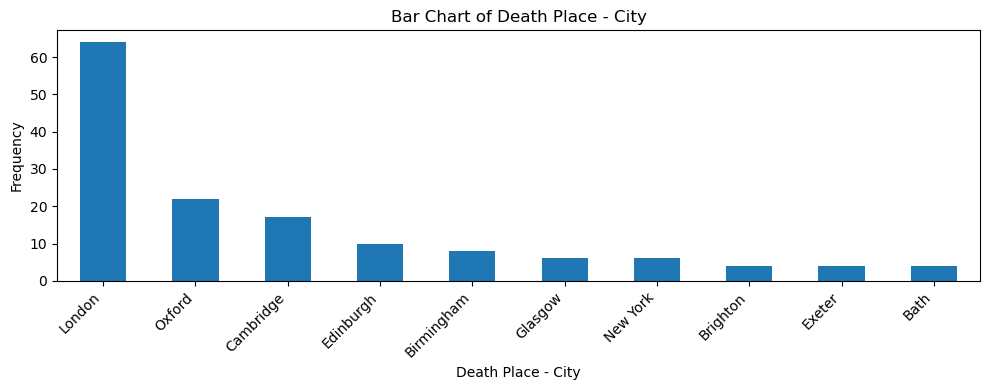

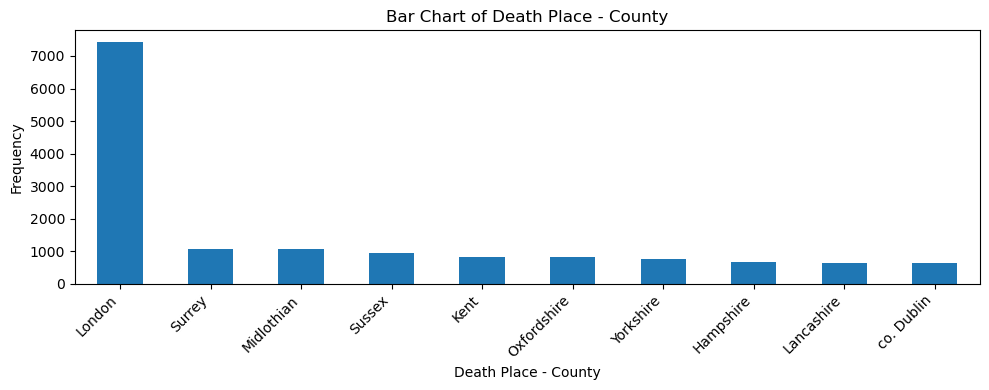

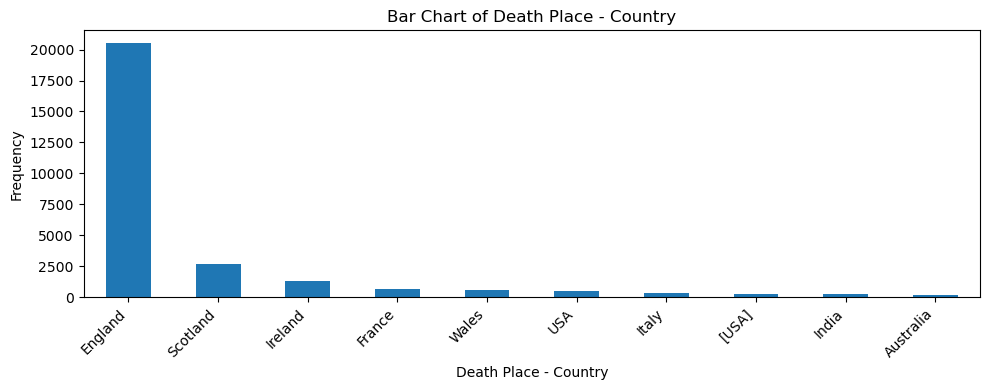

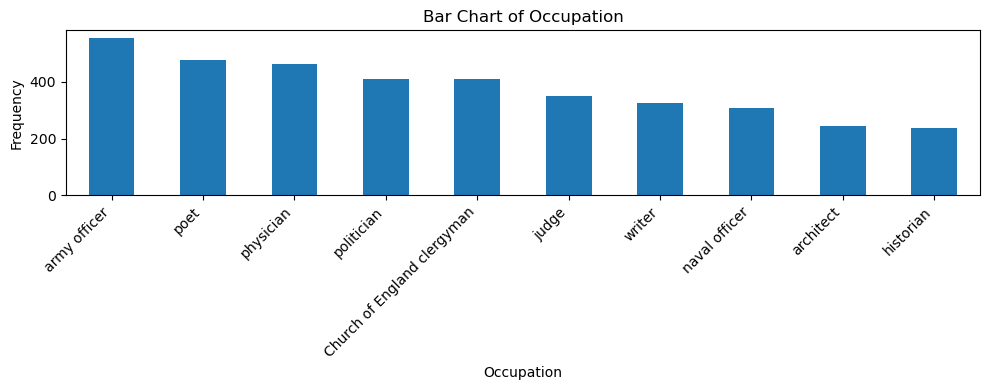

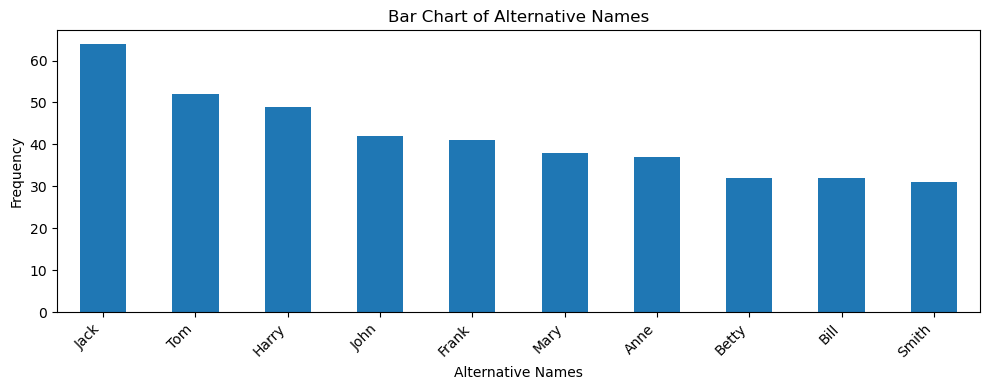

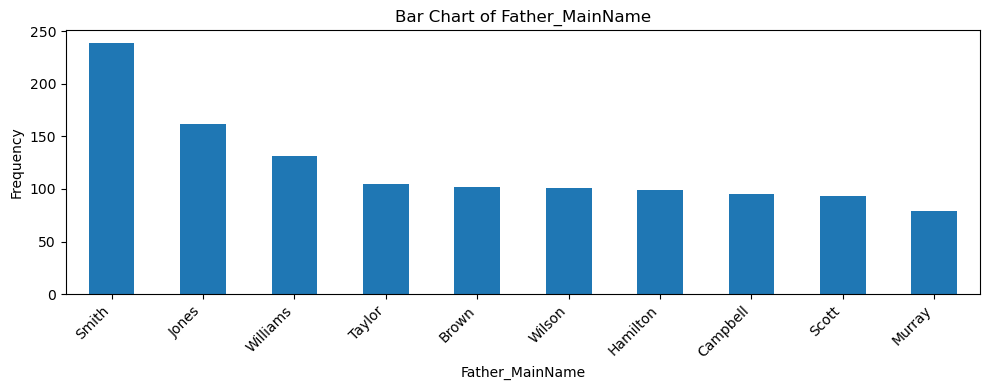

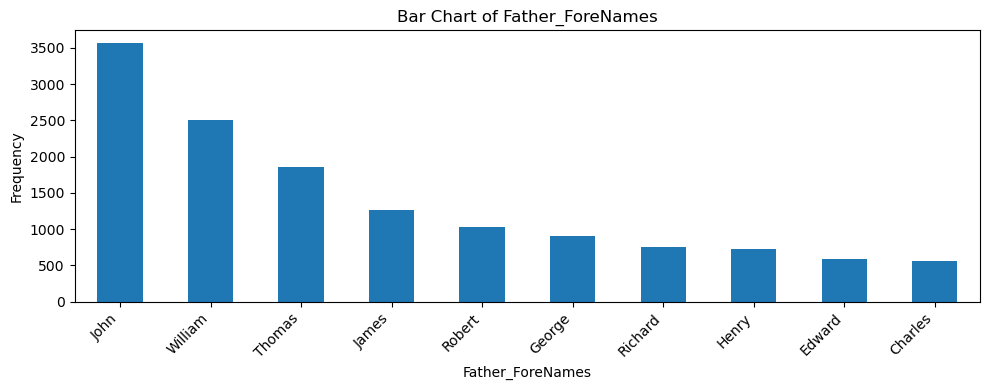

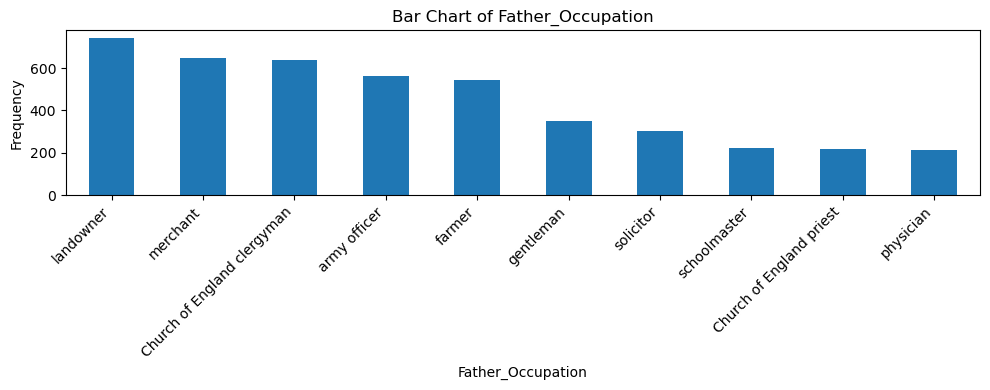

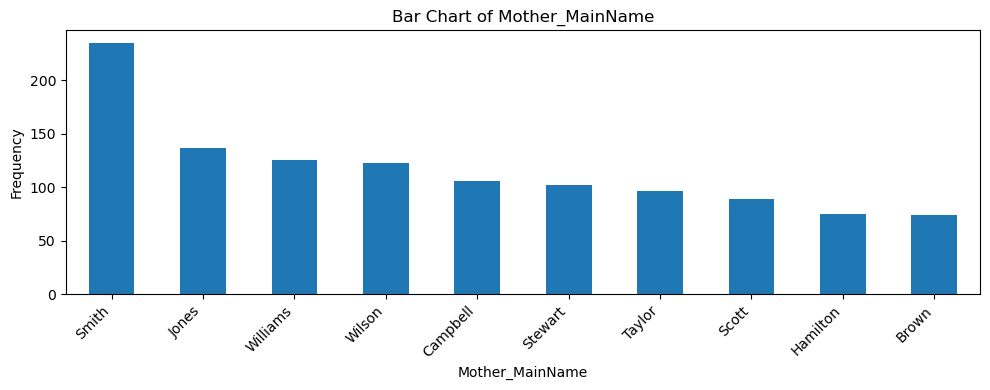

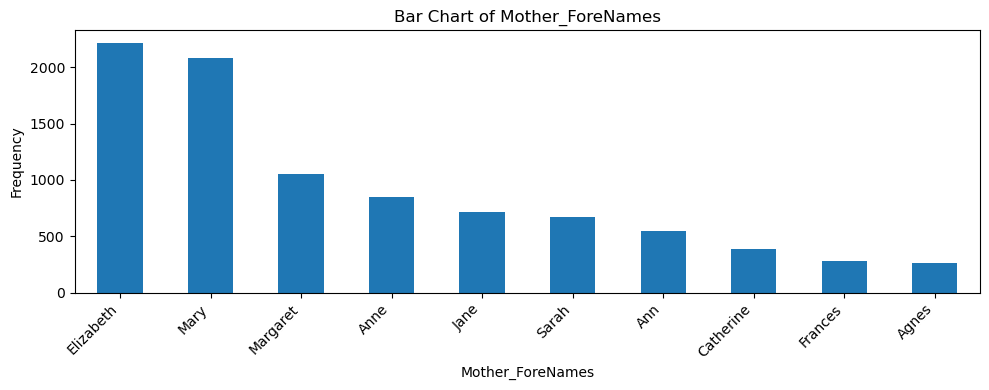

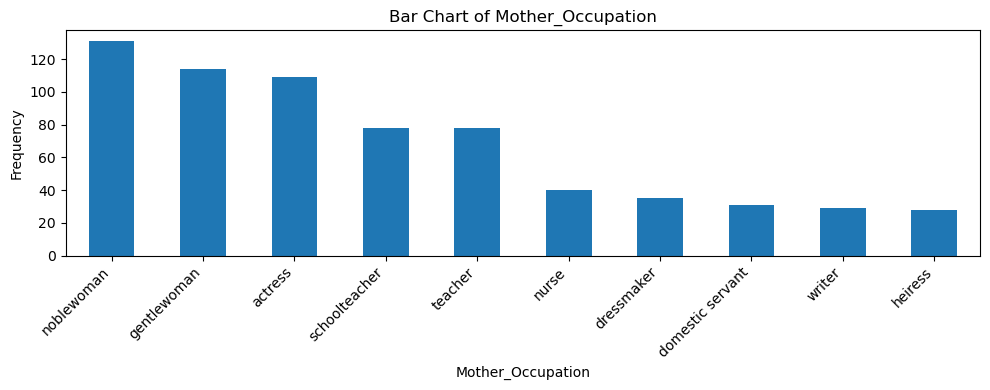

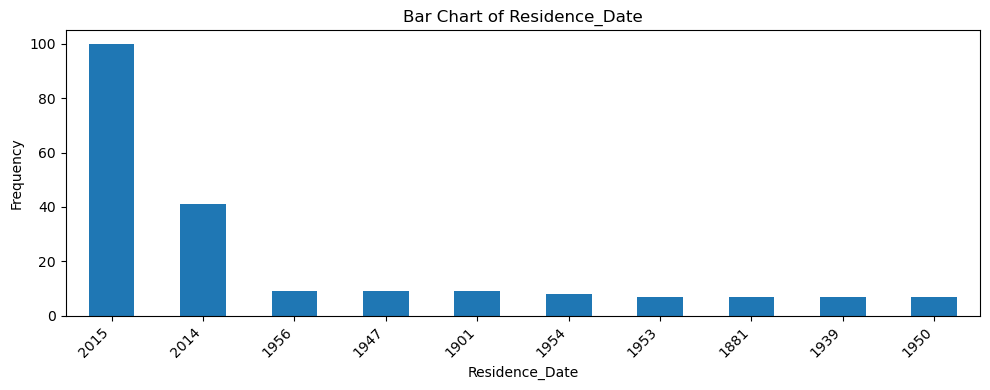

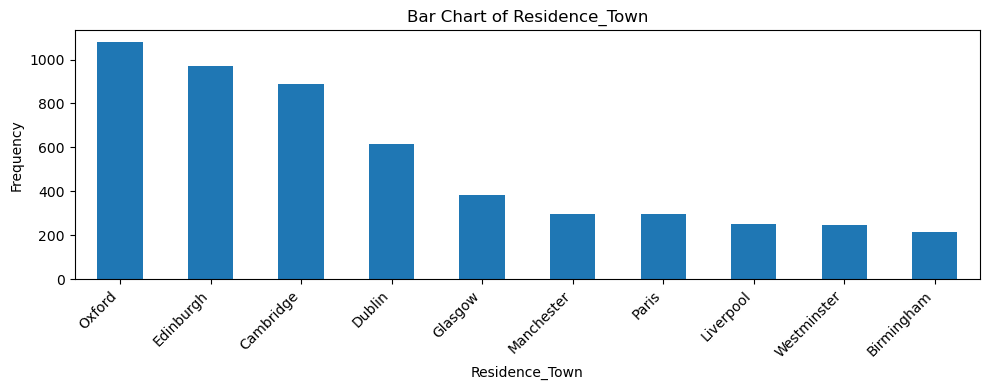

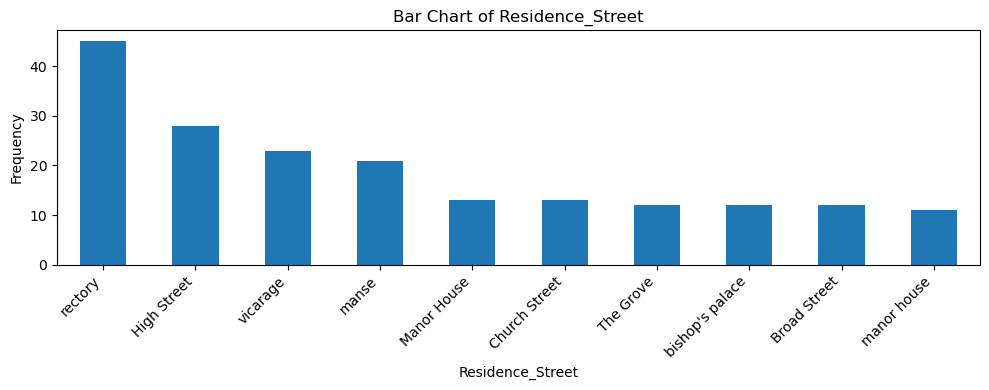

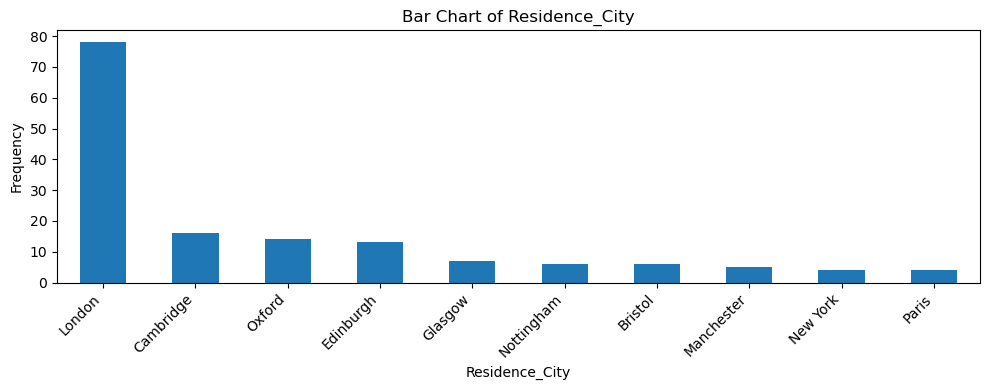

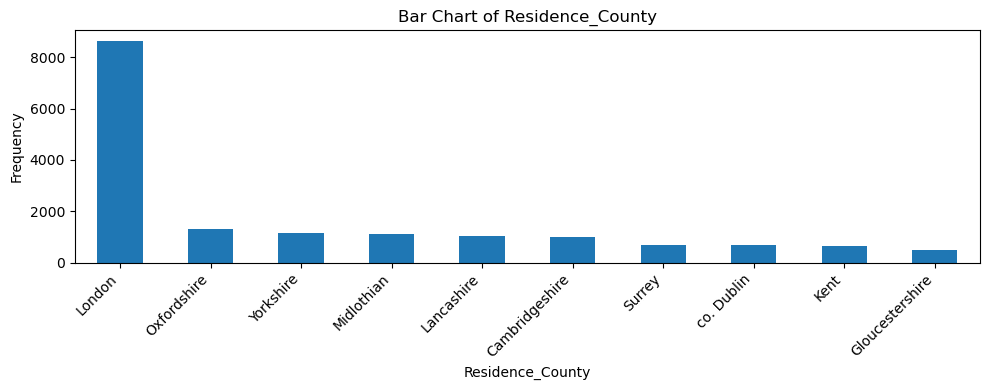

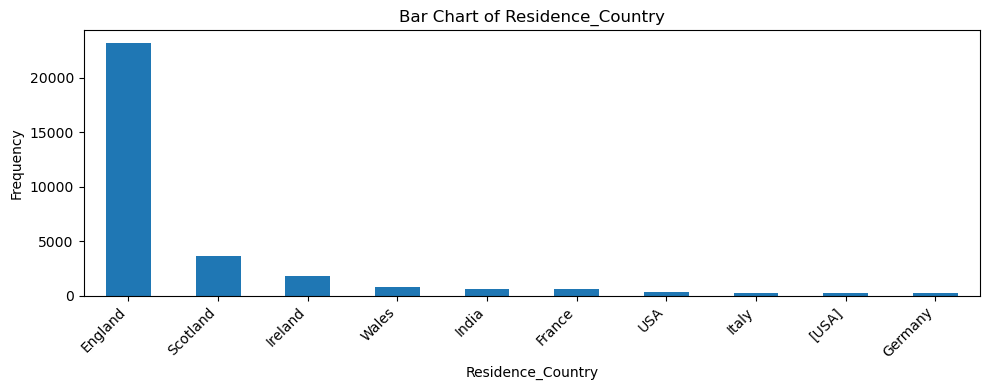

C:\Users\Muneeb Nabeel\AppData\Local\Temp\ipykernel_6820\2073241792.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


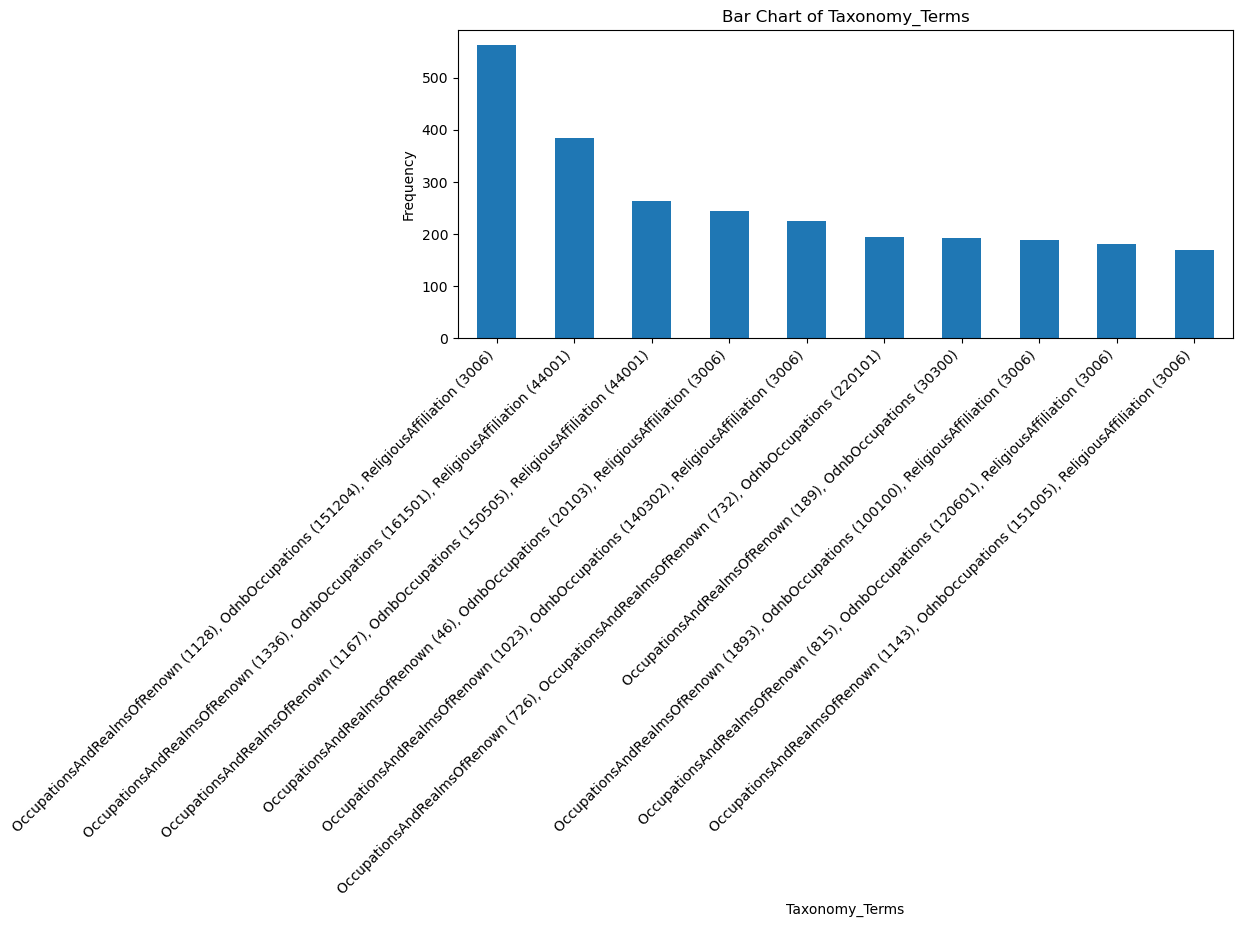

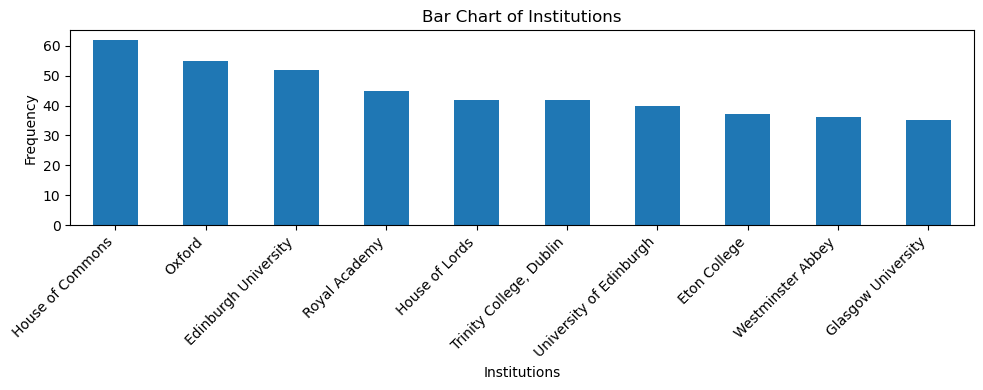

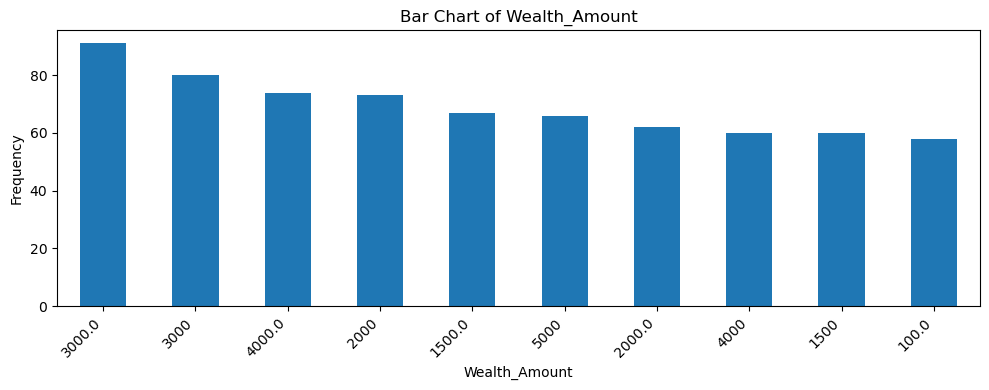

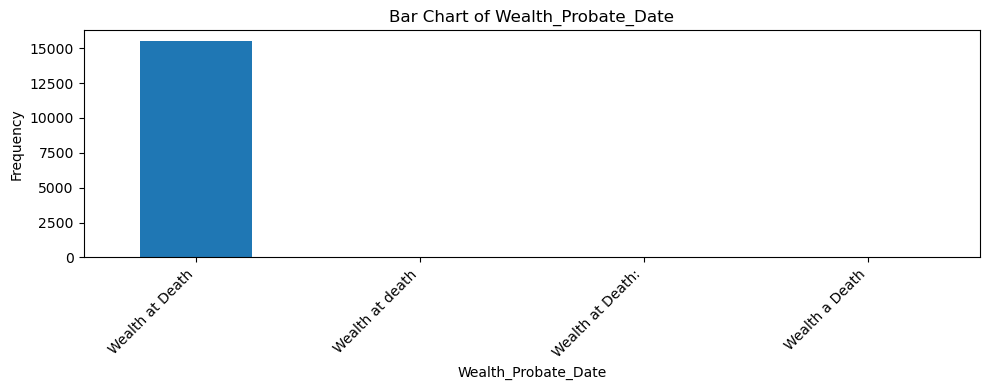

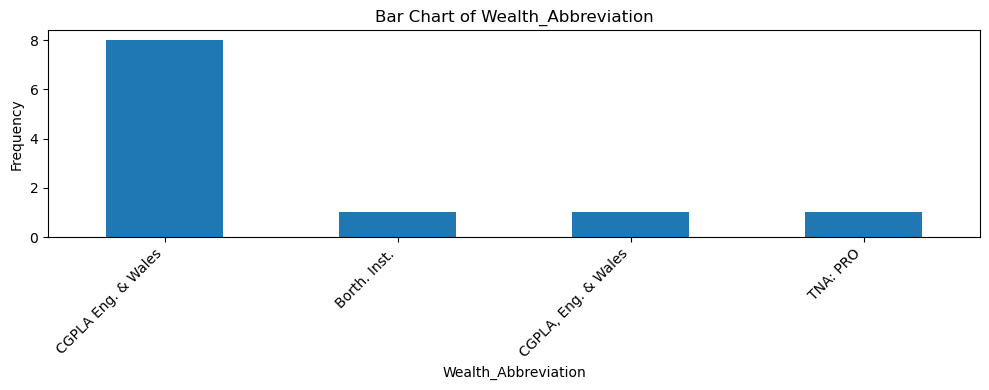

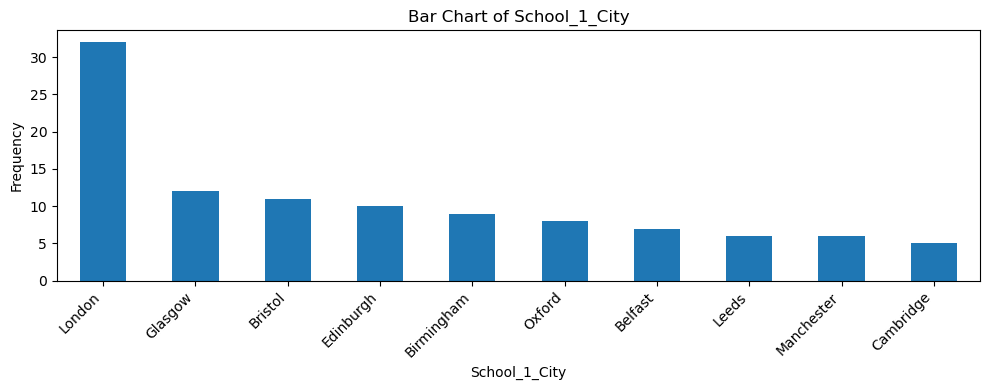

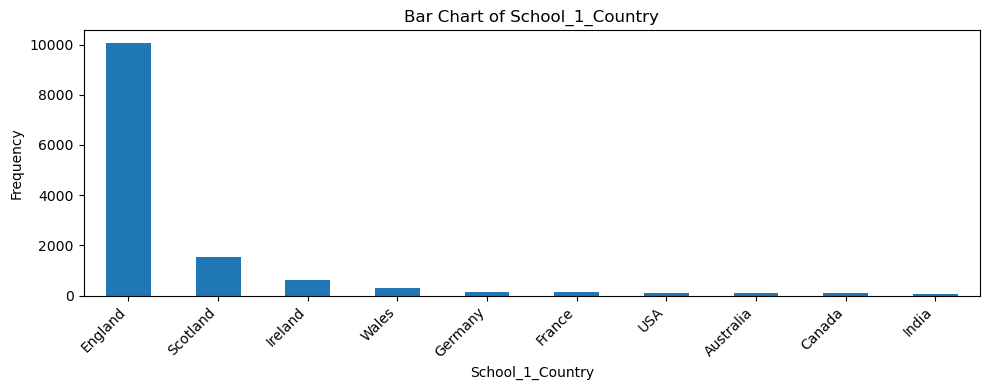

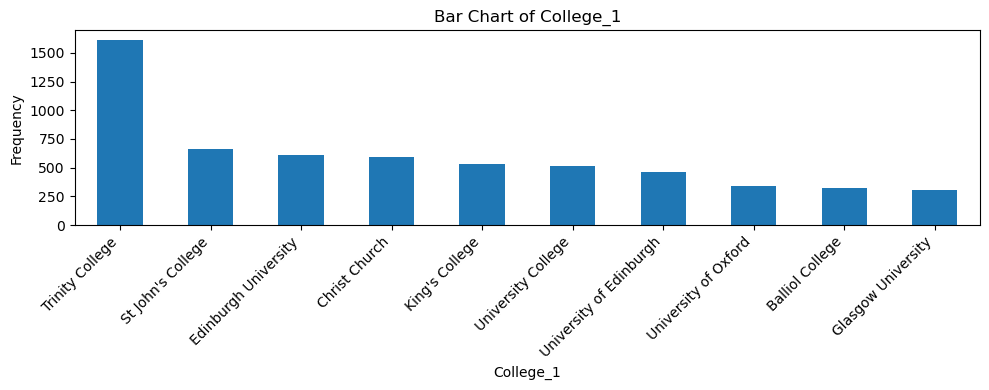

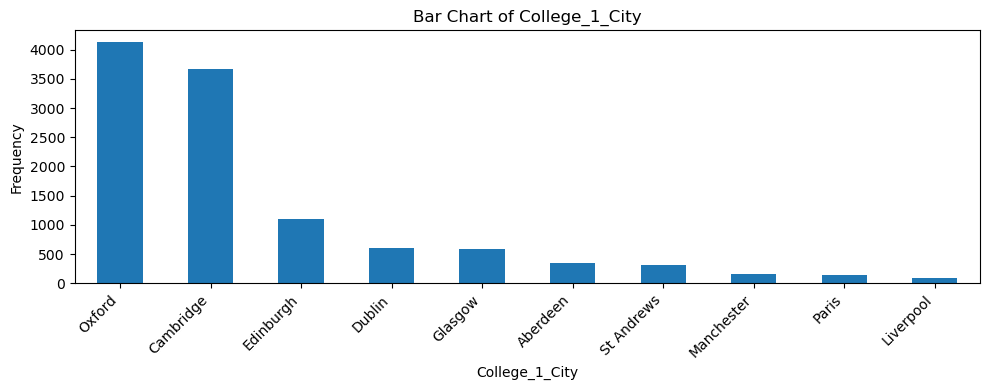

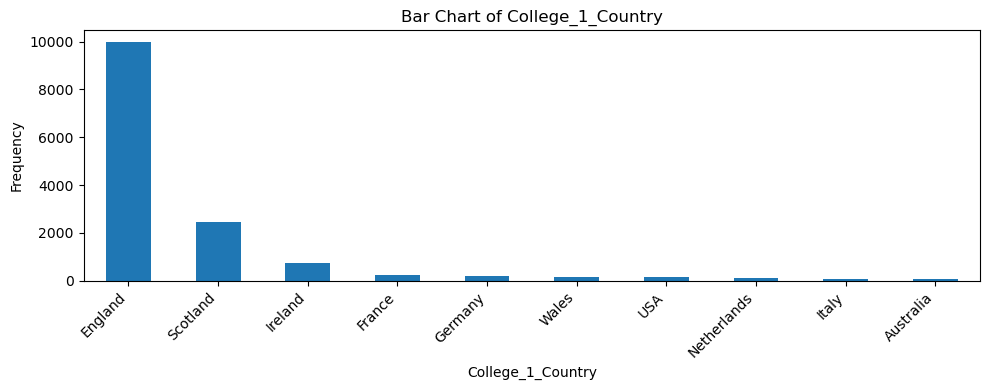

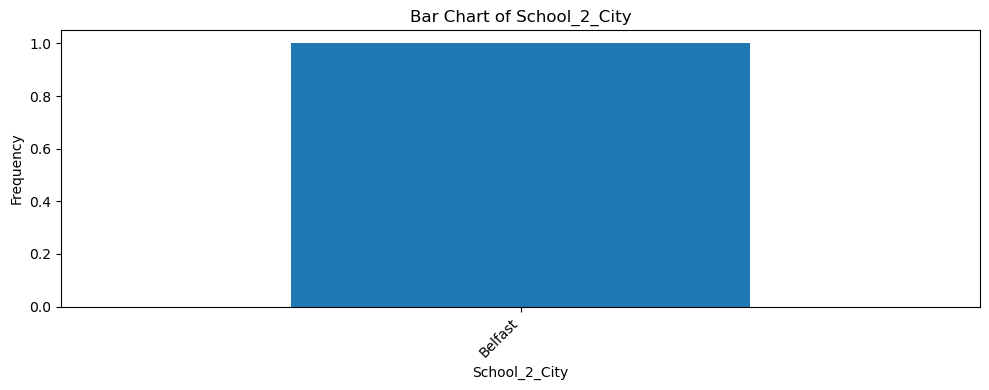

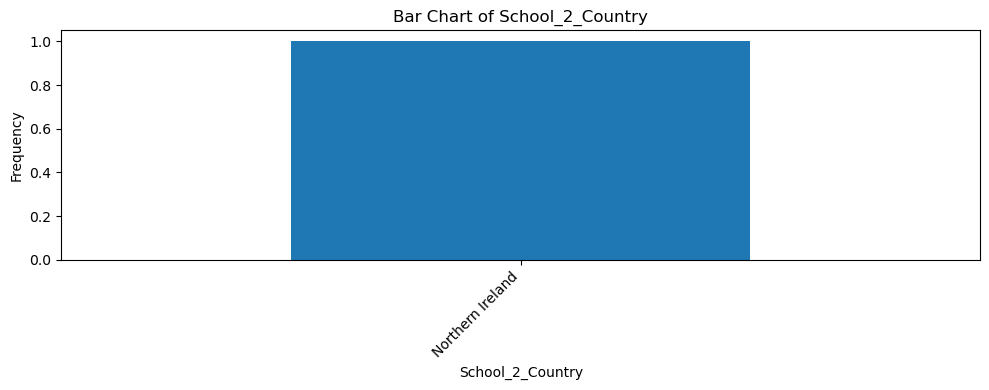

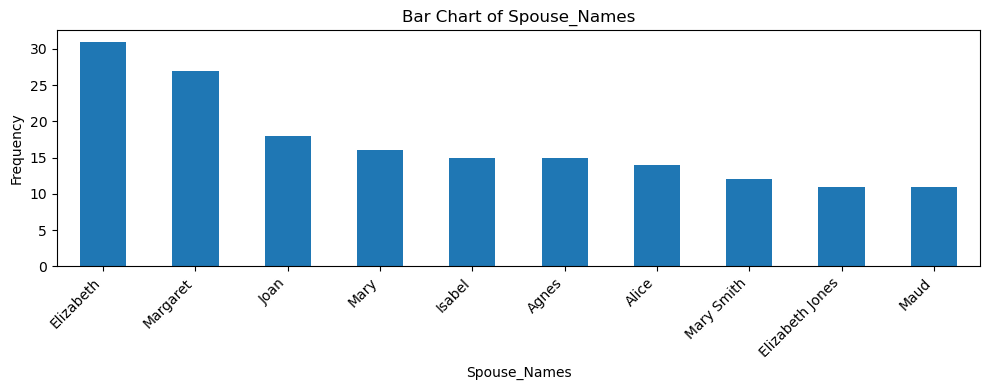

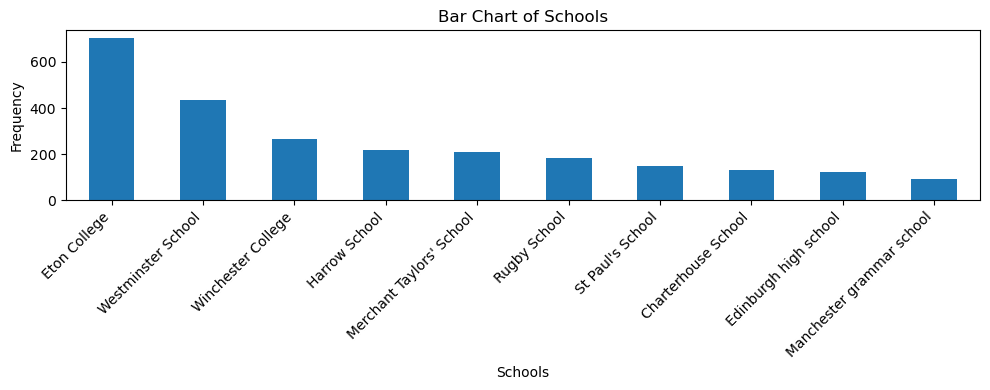

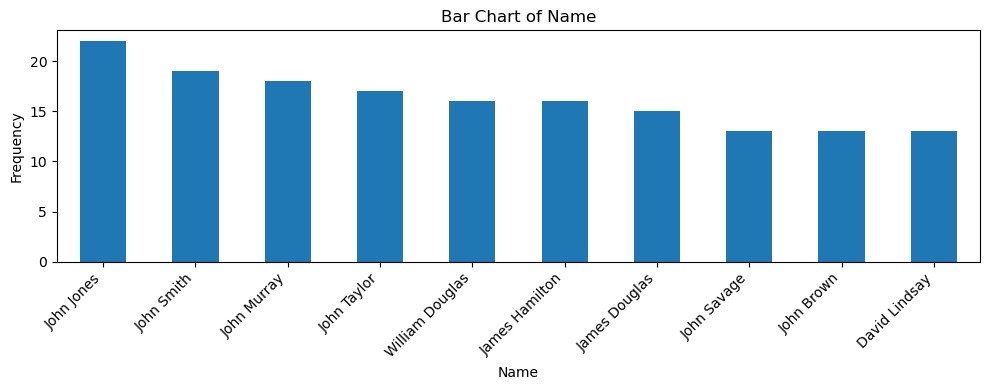

In [7]:
# Univariate Analysis: Bar charts for all categorical data
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in cat_columns:
    plt.figure(figsize=(10, 4))
    value_counts = df[column].value_counts().head(10)  # Show top 10 values only
    if len(value_counts) > 0:  # Only plot if there are values to show
        value_counts.plot(kind='bar')
        plt.title(f'Bar Chart of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

C:\Users\Muneeb Nabeel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


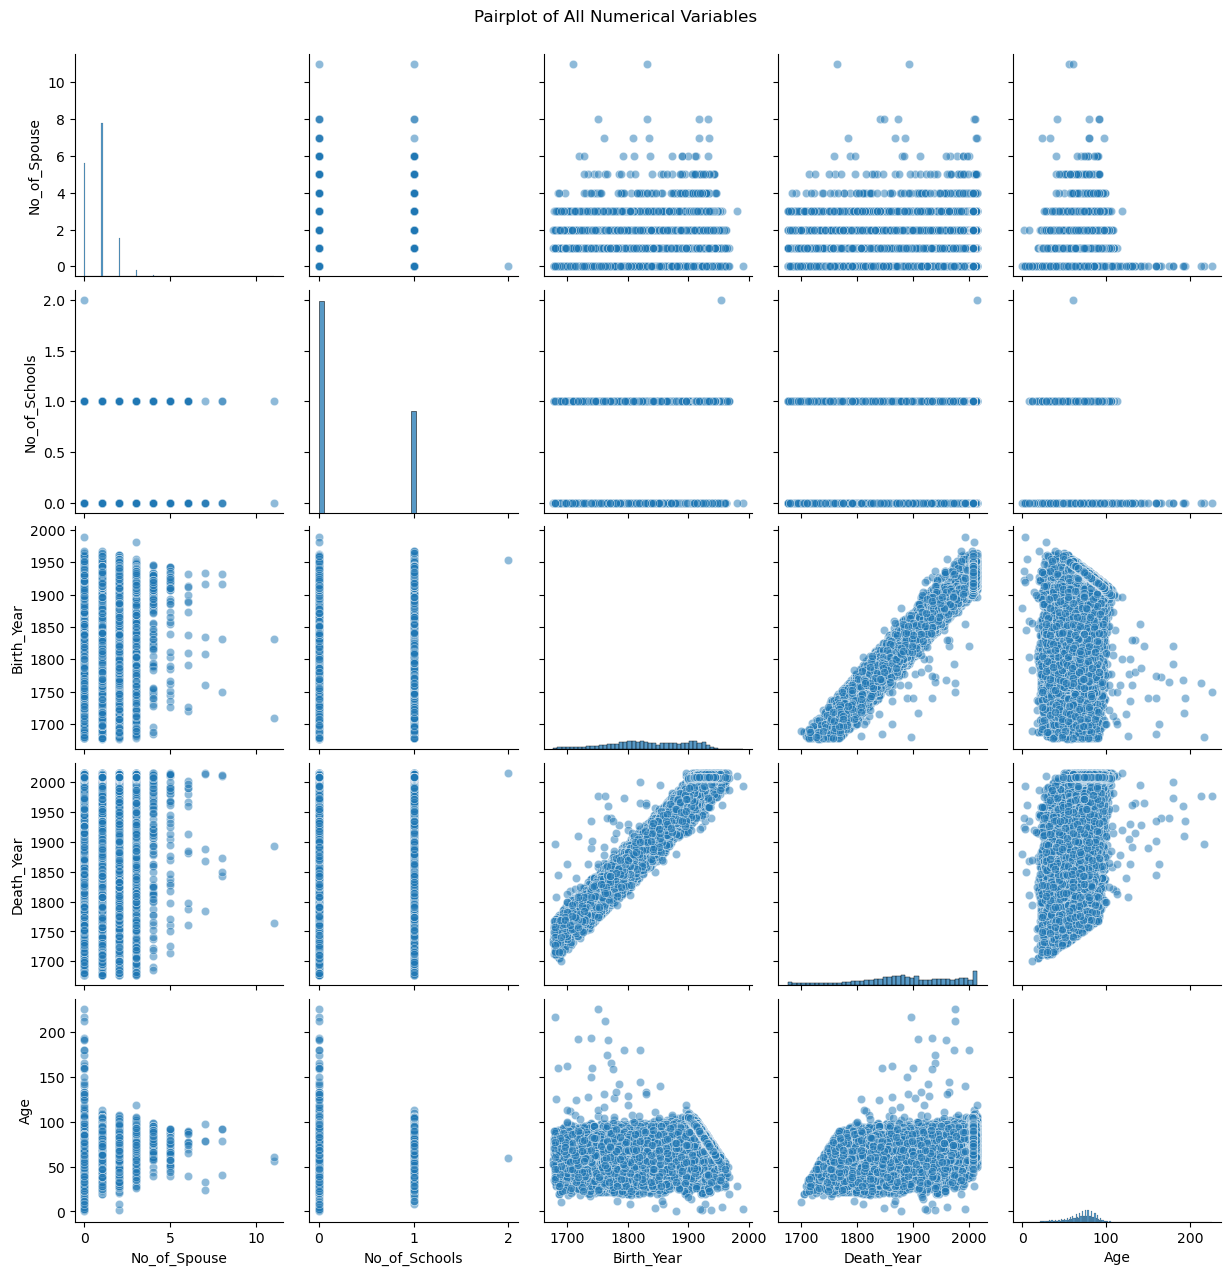

In [8]:
# Bivariate Analysis: Scatter plots for all pairs of numerical data
if len(num_columns) > 1:  # Check if there are at least two numerical columns to compare
    sns.pairplot(df[num_columns], plot_kws={'alpha': 0.5})
    plt.suptitle('Pairplot of All Numerical Variables', y=1.02)
    plt.show()

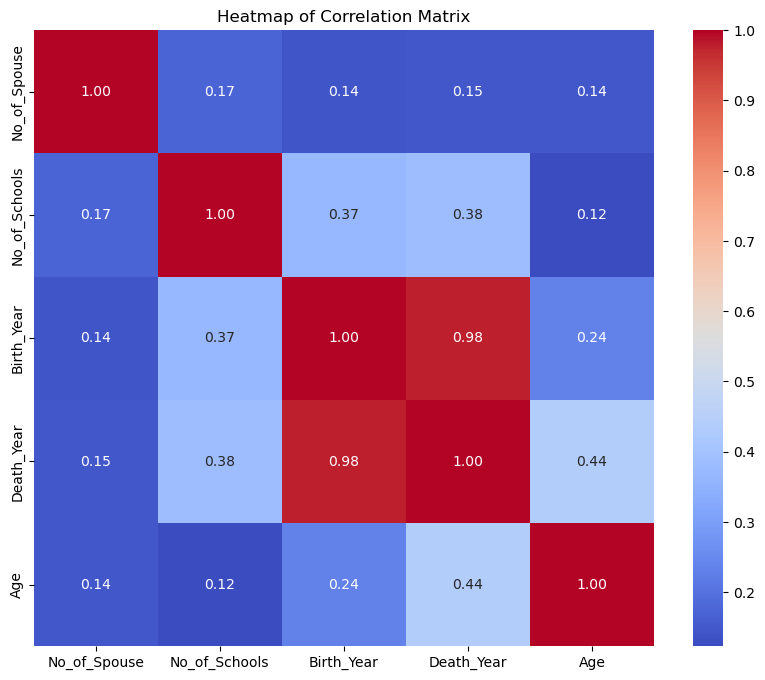

In [9]:
# Correlation matrix heatmap for all numerical data
if len(num_columns) > 0:  # Check if there are numerical columns
    plt.figure(figsize=(10, 8))
    corr_matrix = df[num_columns].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Heatmap of Correlation Matrix')
    plt.show()

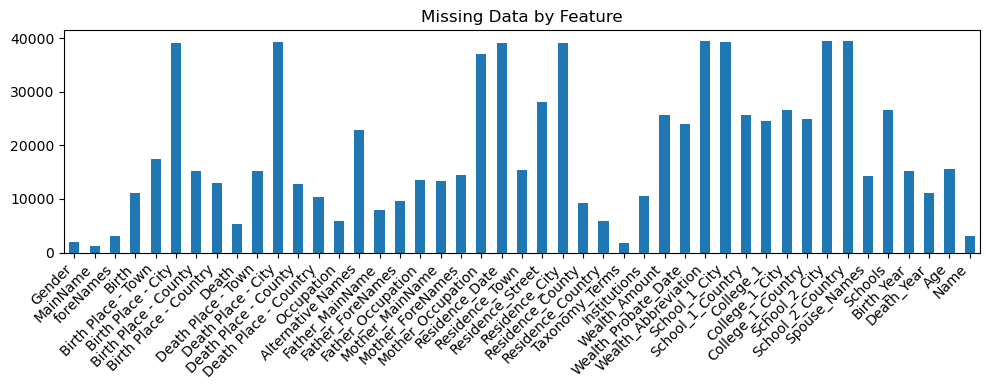

In [10]:
# 2.3.4 Data Quality Assessment
# Missing Values Analysis
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
plt.figure(figsize=(10, 4))
missing_data.plot(kind='bar')
plt.title('Missing Data by Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

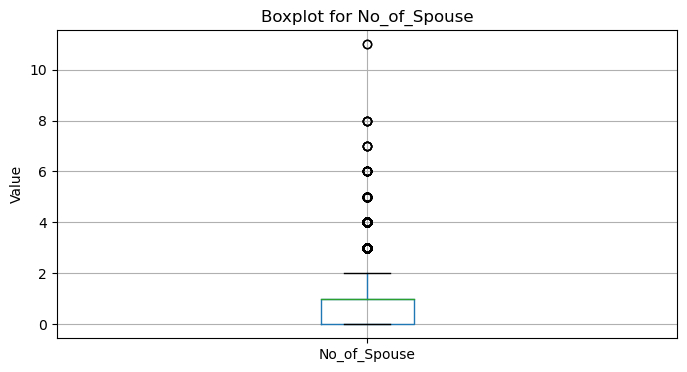

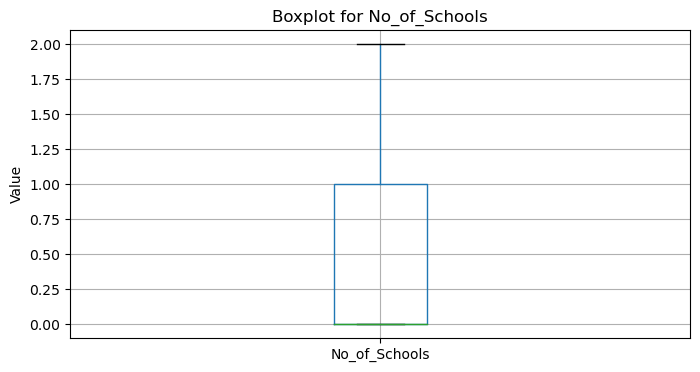

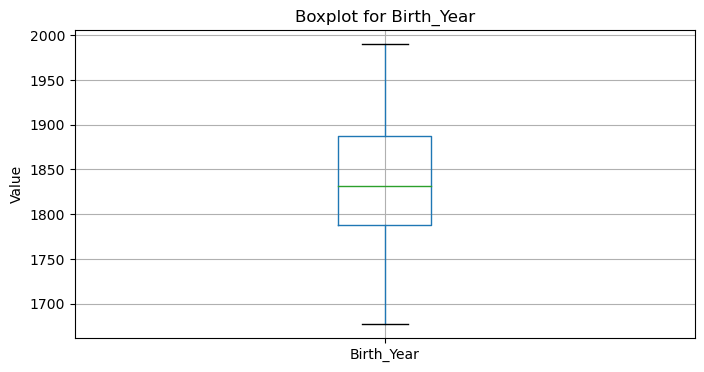

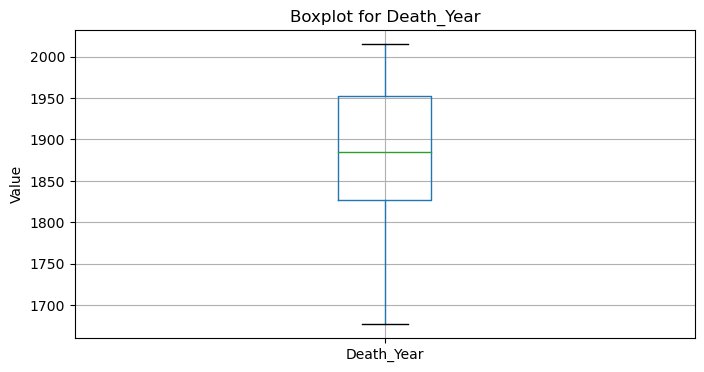

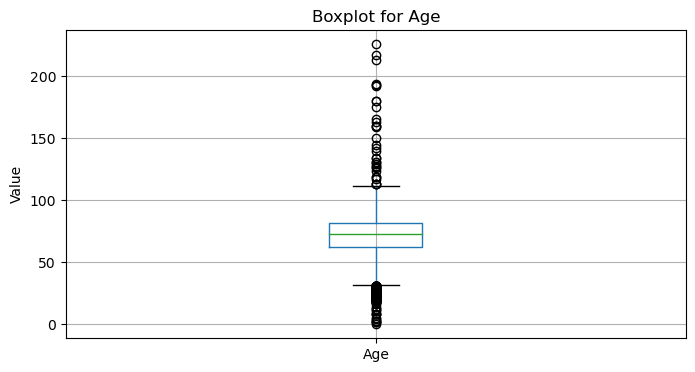

In [11]:
# Outlier Detection: Individual Boxplots for Each Numerical Variable
for column in num_columns:
    plt.figure(figsize=(8, 4))
    df.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.ylabel('Value')
    plt.xticks([1], [column])
    plt.show()

In [12]:
# Consistency Checks (example: check for negative ages)
if (df['Age'] < 0).any():
    print("There are negative values in the Age column.")


# 3. Data Preparation

## Data Cleaning

### Removing irrelivant columns

In [13]:
import pandas as pd

# Assuming df is your existing DataFrame

# List of most relevant features you want to keep
relevant_features = [
    'Gender', 'Birth_Year', 'Death_Year', 'Birth Place - Town', 'Birth Place - Country',
    'Occupation', 'Father_Occupation', 'Mother_Occupation', 'Residence_Town',
    'Residence_Country', 'Wealth_Amount', 'No_of_Spouse',
    'Spouse_Names', 'Age', 'Name'
]

# Creating a new DataFrame that only contains the relevant features
df_relevant = df[relevant_features]

# Display the first few rows of the new DataFrame to confirm it only contains relevant features
print(df_relevant.head())

# Optionally, check the shape of the new DataFrame to ensure it's correct
print("New DataFrame shape:", df_relevant.shape)

  Gender  Birth_Year  Death_Year Birth Place - Town Birth Place - Country  \
0      f      1876.0      1953.0            Hindley               England   
1      f      1878.0      1955.0        New Windsor               England   
2      m      1931.0      2015.0             Rawdon               England   
3      m      1788.0      1845.0         Canterbury               England   
4      m      1794.0      1869.0             Hendon               England   

                               Occupation     Father_Occupation  \
0           actor and theatrical producer  medical practitioner   
1                                 actress                 actor   
2                cricketer and footballer       dyers' labourer   
3  writer and Church of England clergyman              alderman   
4         physician and classical scholar   musician and writer   

  Mother_Occupation Residence_Town Residence_Country Wealth_Amount  \
0               NaN        Dawlish           England    £49,336 

### Handling Missing Values

Percentage of Missing Values in Each Column:
Gender                    5.142091
Birth_Year               38.765595
Death_Year               28.172685
Birth Place - Town       44.279677
Birth Place - Country    32.682137
Occupation               14.679758
Father_Occupation        34.496546
Mother_Occupation        93.979806
Residence_Town           39.051547
Residence_Country        14.687350
Wealth_Amount            64.812612
No_of_Spouse              0.000000
Spouse_Names             36.209733
Age                      39.458967
Name                      7.834603
dtype: float64


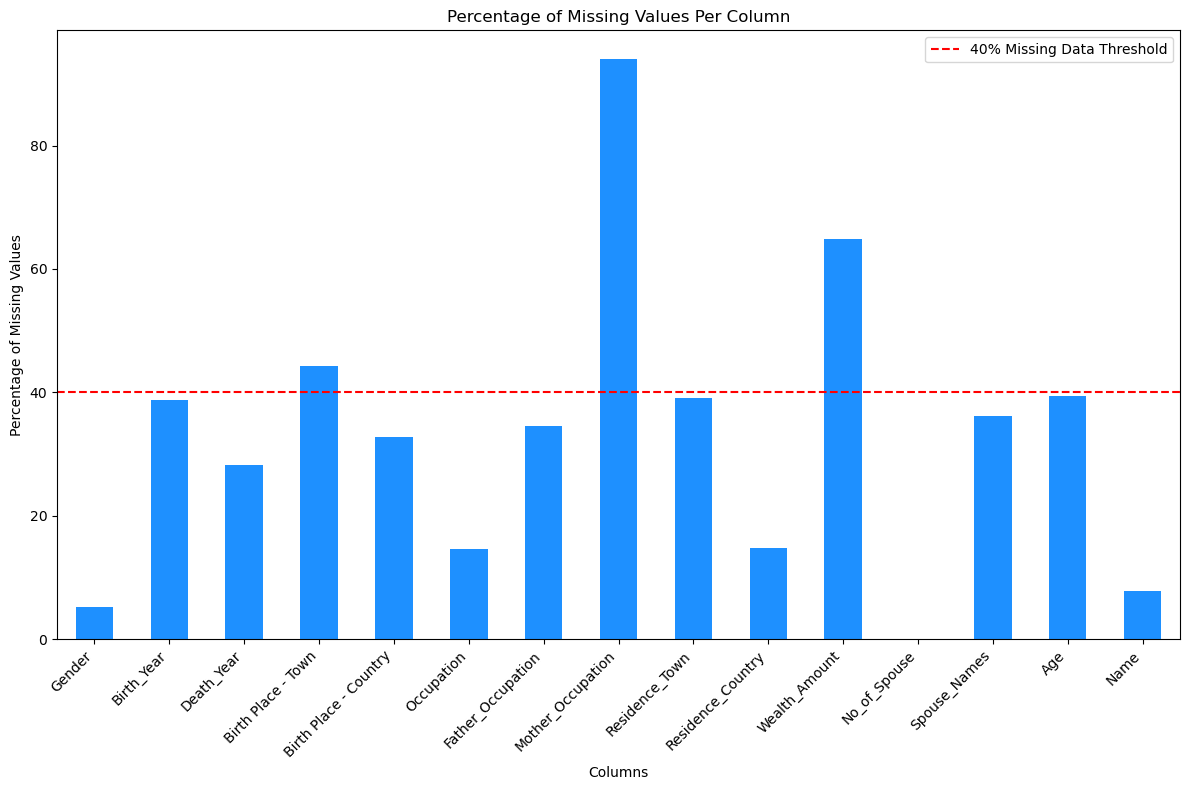


Columns retained after removing those with >40% missing values:
Index(['Gender', 'Birth_Year', 'Death_Year', 'Birth Place - Country',
       'Occupation', 'Father_Occupation', 'Residence_Town',
       'Residence_Country', 'No_of_Spouse', 'Spouse_Names', 'Age', 'Name'],
      dtype='object')

New DataFrame shape: (39517, 12)


In [14]:
# Calculate the percentage of missing values for each column
missing_percent = df_relevant.isnull().mean() * 100

# Print the percentage of missing data for each column
print("Percentage of Missing Values in Each Column:")
print(missing_percent)

# Plotting the percentage of missing values
plt.figure(figsize=(12, 8))
missing_percent.plot(kind='bar', color='dodgerblue')
plt.title('Percentage of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.axhline(y=40, color='r', linestyle='--', label='40% Missing Data Threshold')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify columns with more than 40% missing values
columns_to_drop = missing_percent[missing_percent > 40].index

# Drop these columns from the DataFrame
df_relevant = df_relevant.drop(columns=columns_to_drop)

# Print the updated DataFrame columns
print("\nColumns retained after removing those with >40% missing values:")
print(df_relevant.columns)

# Optionally, display the DataFrame shape to confirm the number of columns dropped
print("\nNew DataFrame shape:", df_relevant.shape)

In [15]:
# Before removal, check the number of rows with missing 'Name'
print("Number of rows with missing 'Name' before removal:", df_relevant['Name'].isnull().sum())

# Remove rows where 'Name' is missing
df_relevant = df_relevant.dropna(subset=['Name'])

# After removal, confirm no more missing 'Name' entries exist
print("Number of rows with missing 'Name' after removal:", df_relevant['Name'].isnull().sum())

Number of rows with missing 'Name' before removal: 3096
Number of rows with missing 'Name' after removal: 0


In [16]:
# Conditional Mode Imputation for Gender

# Calculate the frequency of each category in the 'Gender' column
gender_counts = df_relevant['Gender'].value_counts(normalize=True) * 100  # Get percentages

# Check if the most frequent category exceeds 50% of non-missing entries
if gender_counts.iloc[0] > 50:
    # If more than 50%, use the mode to fill in missing values
    gender_mode = df_relevant['Gender'].mode()[0]
    df_relevant['Gender'].fillna(gender_mode, inplace=True)
    print(f"Missing 'Gender' values filled with mode ('{gender_mode}') as it represents >50% of the data.")
else:
    # If not, consider a different strategy or leave as-is
    print("The most common gender does not exceed 50% of the data. Consider alternative strategies.")

# Print the current status of missing values in the 'Gender' column
print("Number of missing 'Gender' values after conditional imputation:", df_relevant['Gender'].isnull().sum())


Missing 'Gender' values filled with mode ('m') as it represents >50% of the data.
Number of missing 'Gender' values after conditional imputation: 0


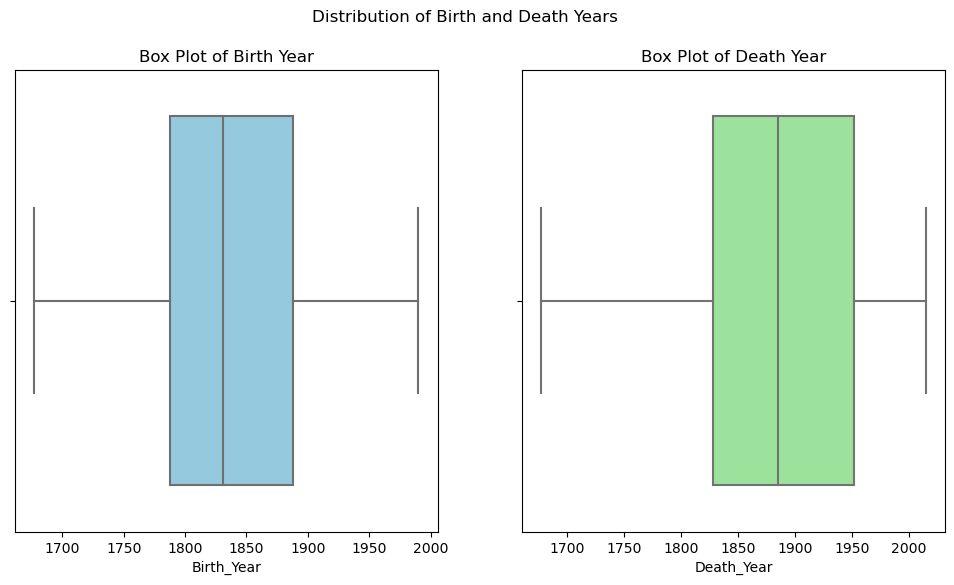

Skewness of Birth Year: -0.2378356878129046
Skewness of Death Year: -0.4043692403132977
Value used for imputing Birth Year: 1832.3044959694175
Value used for imputing Death Year: 1881.4445901406953


In [17]:
# Visualize the distribution of 'Birth_Year' and 'Death_Year' using box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # First subplot for 'Birth_Year'
sns.boxplot(x=df_relevant['Birth_Year'], color='skyblue')
plt.title('Box Plot of Birth Year')

plt.subplot(1, 2, 2)  # Second subplot for 'Death_Year'
sns.boxplot(x=df_relevant['Death_Year'], color='lightgreen')
plt.title('Box Plot of Death Year')

plt.suptitle('Distribution of Birth and Death Years')
plt.show()

# Check skewness to decide on mean or median imputation
birth_year_skew = df_relevant['Birth_Year'].skew()
death_year_skew = df_relevant['Death_Year'].skew()
print(f"Skewness of Birth Year: {birth_year_skew}")
print(f"Skewness of Death Year: {death_year_skew}")

# Conditional imputation based on skewness
if abs(birth_year_skew) > 1:
    # Use median imputation if skewness is high
    birth_year_fill = df_relevant['Birth_Year'].median()
else:
    # Use mean imputation if skewness is not high
    birth_year_fill = df_relevant['Birth_Year'].mean()

if abs(death_year_skew) > 1:
    death_year_fill = df_relevant['Death_Year'].median()
else:
    death_year_fill = df_relevant['Death_Year'].mean()

# Apply the imputation
df_relevant['Birth_Year'].fillna(birth_year_fill, inplace=True)
df_relevant['Death_Year'].fillna(death_year_fill, inplace=True)

# Print the values used for imputation
print(f"Value used for imputing Birth Year: {birth_year_fill}")
print(f"Value used for imputing Death Year: {death_year_fill}")

In [18]:
#this negative skewness indicates a leftward skew

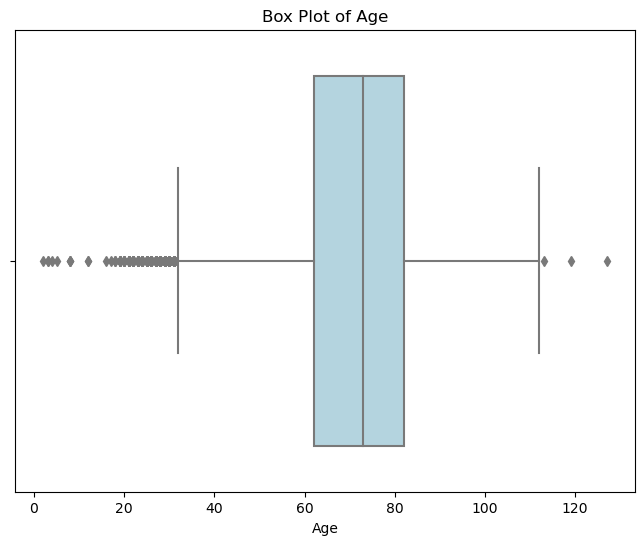

Skewness of Age: -0.7474742405065051
Value used for imputing Age: 70.87985375693394
Number of missing 'Age' values after imputation: 0


In [19]:
# Assuming df_relevant is your DataFrame and 'Age' is the column with missing values

# Visualize the distribution of 'Age' using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_relevant['Age'], color='lightblue')
plt.title('Box Plot of Age')
plt.show()

# Calculate the skewness to decide on mean or median imputation
age_skew = df_relevant['Age'].skew()
print(f"Skewness of Age: {age_skew}")

# Conditional imputation based on skewness
if abs(age_skew) > 1:
    # Use median imputation if skewness is high
    age_fill = df_relevant['Age'].median()
else:
    # Use mean imputation if skewness is not high
    age_fill = df_relevant['Age'].mean()

# Apply the imputation
df_relevant['Age'].fillna(age_fill, inplace=True)

# Print the value used for imputation
print(f"Value used for imputing Age: {age_fill}")

# Verify that there are no more missing values in the 'Age' column
print("Number of missing 'Age' values after imputation:", df_relevant['Age'].isnull().sum())

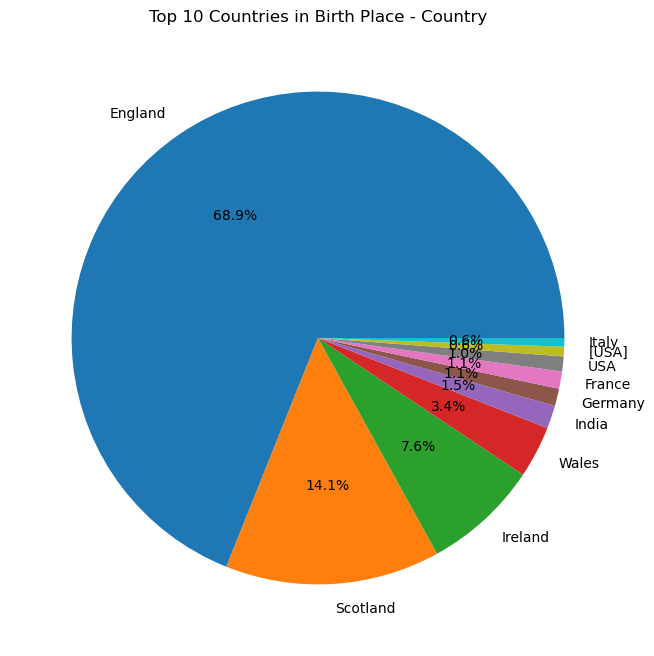

Most common country: England with 64.69% of the entries.
The most common country exceeds 50% of the data. Proceeding with mode imputation.
Number of missing 'Birth Place - Country' values after imputation: 0


In [20]:
# Calculate the frequency of each country
country_counts = df_relevant['Birth Place - Country'].value_counts(normalize=True) * 100

# Plot the distribution using a pie chart
plt.figure(figsize=(10, 8))
country_counts.head(10).plot(kind='pie', autopct='%1.1f%%')  # Displaying only top 10 for clarity
plt.title('Top 10 Countries in Birth Place - Country')
plt.ylabel('')  # Remove the y-label as it's unnecessary
plt.show()

# Check if the top country exceeds 50% occurrence
top_country = country_counts.idxmax()
top_country_percentage = country_counts.max()

print(f"Most common country: {top_country} with {top_country_percentage:.2f}% of the entries.")

# Conditional imputation based on the 50% threshold
if top_country_percentage > 50:
    print("The most common country exceeds 50% of the data. Proceeding with mode imputation.")
    df_relevant['Birth Place - Country'].fillna(top_country, inplace=True)
else:
    print("No country exceeds 50% of the data. Mode imputation is not recommended.")

# Verify that there are no more missing values in the 'Birth Place - Country' column
print("Number of missing 'Birth Place - Country' values after imputation:",
      df_relevant['Birth Place - Country'].isnull().sum())

In [21]:
# Calculate the percentage of matching entries between 'Residence_Country' and 'Birth Place - Country'
matches = (df_relevant['Residence_Country'] == df_relevant['Birth Place - Country']).sum()
total_non_missing = df_relevant.dropna(subset=['Residence_Country', 'Birth Place - Country']).shape[0]
match_percentage = (matches / total_non_missing) * 100

print(f"Percentage of 'Residence_Country' matching 'Birth Place - Country': {match_percentage:.2f}%")

# Check if the matching percentage is high enough to justify filling missing values
if match_percentage > 50:  # You can adjust this threshold as needed
    print("A significant majority of 'Residence_Country' matches 'Birth Place - Country'. Proceeding with filling missing values.")
    # Fill missing values in 'Residence_Country' with values from 'Birth Place - Country'
    df_relevant['Residence_Country'] = df_relevant['Residence_Country'].fillna(df_relevant['Birth Place - Country'])
else:
    print("Not enough matching to justify automatic filling. Consider alternative strategies.")

# Verify the filling process
missing_after = df_relevant['Residence_Country'].isnull().sum()
print(f"Number of missing values in 'Residence_Country' after filling: {missing_after}")

Percentage of 'Residence_Country' matching 'Birth Place - Country': 74.74%
A significant majority of 'Residence_Country' matches 'Birth Place - Country'. Proceeding with filling missing values.
Number of missing values in 'Residence_Country' after filling: 0


In [22]:
# Fill missing values in 'Spouse_Names' with the string 'No Spouse' because this info is meaningfull and cant be just filled with any prediction
df_relevant['Spouse_Names'] = df_relevant['Spouse_Names'].fillna('No Spouse')

# Verify the operation by checking for any remaining missing values in 'Spouse_Names'
print("Number of missing 'Spouse_Names' values after filling:", df_relevant['Spouse_Names'].isnull().sum())

Number of missing 'Spouse_Names' values after filling: 0


In [23]:
# Count missing values in Residence_Town
missing_residence_town = df_relevant['Residence_Town'].isnull().sum()
print("Number of missing values in Residence_Town:", missing_residence_town)

Number of missing values in Residence_Town: 12968


In [24]:
# Create a new DataFrame with only rows where 'Residence_Town' is not missing
df_valid_town = df_relevant.dropna(subset=['Residence_Town'])

# Group by 'Residence_Country' and get the most common 'Residence_Town' for each
most_common_towns = df_valid_town.groupby('Residence_Country')['Residence_Town'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")

# Get the count of each town for each country
town_counts = df_valid_town.groupby(['Residence_Country', 'Residence_Town']).size().reset_index(name='count')

# Sort the counts in ascending order
town_counts_sorted = town_counts.sort_values(by=['Residence_Country', 'count'], ascending=[True, False])

# Iterate over unique countries and print the most common town with its count
for country in most_common_towns.index:
    most_common_town = most_common_towns[country]
    town_count = town_counts_sorted[(town_counts_sorted['Residence_Country'] == country) & (town_counts_sorted['Residence_Town'] == most_common_town)]['count'].iloc[0]
    print(f"For {country}, the most common town is {most_common_town} with a count of {town_count}.")


For Afghanistan, the most common town is Karnal with a count of 1.
For Africa Proconsularis, the most common town is Hadrumetum with a count of 1.
For Algeria, the most common town is Algiers with a count of 1.
For America, the most common town is Charleston with a count of 1.
For Argentina, the most common town is Buenos Aires with a count of 2.
For Asia Minor, the most common town is Alexandretta with a count of 1.
For Australia, the most common town is Sydney with a count of 49.
For Austria, the most common town is Vienna with a count of 39.
For Austria-Hungary, the most common town is Rogalin with a count of 1.
For Austrian Netherlands, the most common town is Antwerp with a count of 2.
For Austria–Hungary, the most common town is Vienna with a count of 1.
For Bahamas, the most common town is Nassau with a count of 1.
For Barbados, the most common town is Bridgetown with a count of 3.
For Bavaria, the most common town is Nordlingen with a count of 1.
For Belgian Congo, the most com

For Tanganyika [Tanzania], the most common town is Dar es Salaam with a count of 1.
For Thailand, the most common town is Bangkok with a count of 1.
For Trinidad, the most common town is Port of Spain with a count of 1.
For Trinidad [Trinidad and Tobago], the most common town is Port of Spain with a count of 2.
For Tripolitania, the most common town is Lepcis Magna with a count of 1.
For Turkey, the most common town is Constantinople with a count of 8.
For Turkish Ottoman empire, the most common town is Constantinople with a count of 1.
For UK, the most common town is Hatfield with a count of 2.
For USA, the most common town is New York city with a count of 68.
For Uganda, the most common town is Kampala with a count of 2.
For Ukraine, the most common town is Odessa with a count of 1.
For Upper Canada, the most common town is Kingston with a count of 1.
For Upper Canada [Ontario], the most common town is Trafalgar with a count of 1.
For Uruguay, the most common town is Montevideo with 

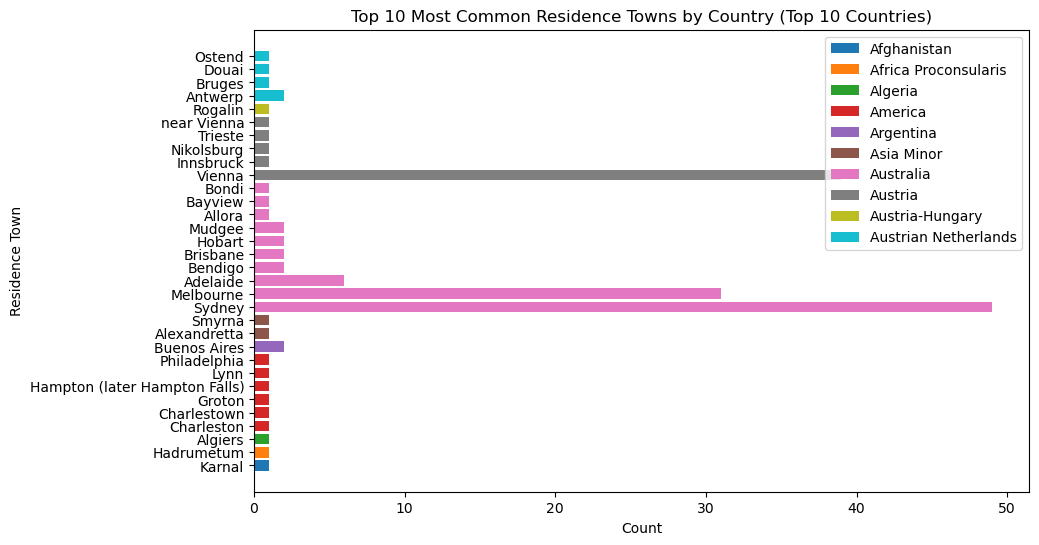

In [25]:

# Get the top 10 countries
top_10_countries = most_common_towns.index[:10]

# Plot the top 10 most common towns for the top 10 countries
plt.figure(figsize=(10, 6))
for country in top_10_countries:
    town_count = town_counts_sorted[town_counts_sorted['Residence_Country'] == country][:10]
    plt.barh(town_count['Residence_Town'], town_count['count'], label=country)

plt.xlabel('Count')
plt.ylabel('Residence Town')
plt.title('Top 10 Most Common Residence Towns by Country (Top 10 Countries)')
plt.legend()
plt.show()


In [26]:
# Iterate over unique countries and fill missing town values in df_relevant
for country in most_common_towns.index:
    most_common_town = most_common_towns[country]
    df_relevant.loc[(df_relevant['Residence_Country'] == country) & (df_relevant['Residence_Town'].isnull()), 'Residence_Town'] = most_common_town

# Check if there are any missing values left
missing_town_count = df_relevant['Residence_Town'].isnull().sum()
if missing_town_count == 0:
    print("All missing values in Residence_Town have been filled successfully.")
else:
    print(f"There are still {missing_town_count} missing values in Residence_Town.")


There are still 174 missing values in Residence_Town.


In [27]:
# Drop rows with missing values in Residence_Town
df_relevant = df_relevant.dropna(subset=['Residence_Town'])

# Check the shape of the DataFrame after dropping rows
print("Shape of df_relevant after dropping rows with missing values in Residence_Town:", df_relevant.shape)


Shape of df_relevant after dropping rows with missing values in Residence_Town: (36247, 12)


In [28]:
# Count missing values in 'Occupation' and 'Father_Occupation'
missing_occupation = df_relevant['Occupation'].isnull().sum()
missing_father_occupation = df_relevant['Father_Occupation'].isnull().sum()

# Count missing values where either 'Occupation' or 'Father_Occupation' is missing
missing_either = df_relevant[['Occupation', 'Father_Occupation']].isnull().any(axis=1).sum()

# Total number of records
total_records = len(df_relevant)

# Calculate percentage of missing values
percentage_missing_occupation = (missing_occupation / total_records) * 100
percentage_missing_father_occupation = (missing_father_occupation / total_records) * 100
percentage_missing_either = (missing_either / total_records) * 100

print("Percentage of missing values in Occupation column:", percentage_missing_occupation)
print("Percentage of missing values in Father_Occupation column:", percentage_missing_father_occupation)
print("Percentage of missing values where either Occupation or Father_Occupation is missing:", percentage_missing_either)


Percentage of missing values in Occupation column: 10.657433718652578
Percentage of missing values in Father_Occupation column: 29.472783954534172
Percentage of missing values where either Occupation or Father_Occupation is missing: 35.69674731701934


In [29]:
# Dropping rows with missing values in 'Occupation' and 'Father_Occupation' ensures that we retain data points where occupation information, which is important for analysis, is available.
# Drop rows where either 'Occupation' or 'Father_Occupation' is missing
df_relevant.dropna(subset=['Occupation', 'Father_Occupation'], inplace=True)


Percentage of Missing Values in Each Column:
Gender                   0.0
Birth_Year               0.0
Death_Year               0.0
Birth Place - Country    0.0
Occupation               0.0
Father_Occupation        0.0
Residence_Town           0.0
Residence_Country        0.0
No_of_Spouse             0.0
Spouse_Names             0.0
Age                      0.0
Name                     0.0
dtype: float64


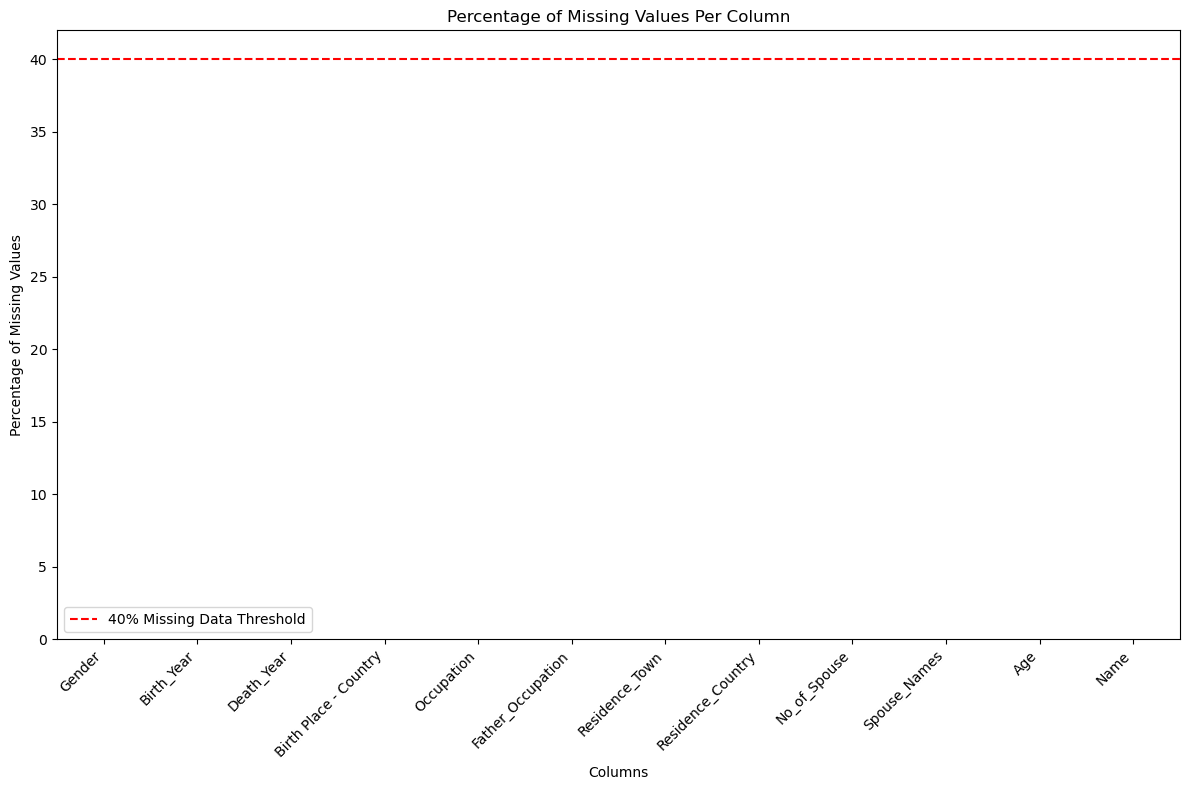


Columns retained after removing those with >40% missing values:
Index(['Gender', 'Birth_Year', 'Death_Year', 'Birth Place - Country',
       'Occupation', 'Father_Occupation', 'Residence_Town',
       'Residence_Country', 'No_of_Spouse', 'Spouse_Names', 'Age', 'Name'],
      dtype='object')

New DataFrame shape: (23308, 12)


In [30]:
# Calculate the percentage of missing values for each column
missing_percent = df_relevant.isnull().mean() * 100

# Print the percentage of missing data for each column
print("Percentage of Missing Values in Each Column:")
print(missing_percent)

# Plotting the percentage of missing values
plt.figure(figsize=(12, 8))
missing_percent.plot(kind='bar', color='dodgerblue')
plt.title('Percentage of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.axhline(y=40, color='r', linestyle='--', label='40% Missing Data Threshold')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify columns with more than 40% missing values
columns_to_drop = missing_percent[missing_percent > 40].index

# Drop these columns from the DataFrame
df_relevant = df_relevant.drop(columns=columns_to_drop)

# Print the updated DataFrame columns
print("\nColumns retained after removing those with >40% missing values:")
print(df_relevant.columns)

# Optionally, display the DataFrame shape to confirm the number of columns dropped
print("\nNew DataFrame shape:", df_relevant.shape)

### Outlier Detection

In [31]:

z_scores = np.abs((df_relevant['Age'] - df_relevant['Age'].mean()) / df_relevant['Age'].std())
Q1 = df_relevant['Age'].quantile(0.25)
Q3 = df_relevant['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers_z_score = df_relevant[z_scores > 3]
outliers_IQR = df_relevant[(df_relevant['Age'] < (Q1 - 1.5 * IQR)) | (df_relevant['Age'] > (Q3 + 1.5 * IQR))]
percentage_outliers_z_score = len(outliers_z_score) / len(df_relevant) * 100
percentage_outliers_IQR = len(outliers_IQR) / len(df_relevant) * 100
chosen_method = 'Z-score' if percentage_outliers_z_score < percentage_outliers_IQR else 'IQR'

print(f"Percentage of outliers detected by Z-score method: {percentage_outliers_z_score:.2f}%")
print(f"Percentage of outliers detected by IQR method: {percentage_outliers_IQR:.2f}%")
print(f"Chosen method for handling outliers in 'Age': {chosen_method}")


Percentage of outliers detected by Z-score method: 1.19%
Percentage of outliers detected by IQR method: 6.38%
Chosen method for handling outliers in 'Age': Z-score


### Standardization

In [32]:
# Create a MinMaxScaler and StandardScaler object
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max scaling to 'Age'
df_relevant['Scaled_Age_MinMax'] = min_max_scaler.fit_transform(df_relevant[['Age']])

# Apply Standardization to 'Age'
df_relevant['Scaled_Age_Standard'] = standard_scaler.fit_transform(df_relevant[['Age']])

# Print the first few rows to verify the results
print(df_relevant[['Age', 'Scaled_Age_MinMax', 'Scaled_Age_Standard']].head())

    Age  Scaled_Age_MinMax  Scaled_Age_Standard
0  77.0              0.600             0.404288
2  84.0              0.656             0.928528
3  57.0              0.440            -1.093539
4  75.0              0.584             0.254506
5  43.0              0.328            -2.142018


### handling same names

In [33]:
# Check for duplicate names
duplicate_names = df_relevant['Name'].duplicated(keep=False)
duplicated_names = df_relevant[duplicate_names]['Name'].unique()

if len(duplicated_names) > 0:
    print(f"Duplicate names found ({len(duplicated_names)} names in total):")
    print(duplicated_names)
else:
    print("No duplicate names found.")


Duplicate names found (965 names in total):
['Thomas Barker' 'John Barnard' 'Nicholas Barnewall' 'Robert Baron'
 'George Barrow' 'Edward Barry' 'John Barton' 'James Basire'
 'William Basset' 'John Beaumont' 'Robert Breteuil' 'Michael Belet'
 'Andrew Bell' 'John Bell' 'Robert Bell' 'Thomas Bell' 'William Bell'
 'Thomas Bennet' 'Richard Bentley' 'Richard Baldwin' 'John Bethune'
 'Alfred Cox' 'Richard Bingham' 'Samuel Birch' 'James Bird'
 'Thomas Blackwell' 'Robert Blair' 'Francis Blake' 'John Bland'
 'George Bogle' 'James Bonar' 'John Bonar' 'James Booth'
 'William Borthwick' 'Thomas Boston' 'Thomas Bott' 'John Abercrombie'
 'Alexander Abercromby' 'John Bowen' 'George Bowes' 'Robert Bowes'
 'Robert Bowyer' 'Hugh Boyd' 'John Boys' 'John Abernethy' 'John Bradford'
 'Henry Bradshaw' 'John Bradshaw' 'John Brailsford' 'John Braithwaite'
 'John Brand' 'John Briggs' 'William Briggs' 'Alexander Brodie'
 'James Brown' 'John Brown' 'Thomas Brown' 'James Adam' 'William Brown'
 'James Browne' 'John 

In [34]:
# Iterate through df_relevant and remove rows with duplicate names
for index, row in df_relevant.iterrows():
    if row['Name'] in duplicated_names:
        df_relevant.drop(index, inplace=True)

# Confirm removal of duplicate names
print("Duplicate names removed.")


Duplicate names removed.


### handling Residence_Country

In [35]:
# Clean the Residence_Country column to ensure consistency, e.g., merging [USA] with USA
df_relevant['Residence_Country'] = df_relevant['Residence_Country'].replace('[USA]', 'USA')

# Identify the top 9 countries
top_9_countries = df_relevant['Residence_Country'].value_counts().head(9).index

# Create a new column where only the top 9 countries are retained, and all others are labeled as 'Other'
df_relevant['Residence_Country_Consolidated'] = df_relevant['Residence_Country'].apply(lambda x: x if x in top_9_countries else 'Other')

# Verify the new distribution of Residence_Country_Consolidated
print(df_relevant['Residence_Country_Consolidated'].value_counts())

Residence_Country_Consolidated
England      14831
Scotland      1934
Other         1250
Ireland       1002
USA            449
India          440
Wales          414
France         283
Australia      155
Germany        150
Name: count, dtype: int64


### Frequency-Based Binning for Residence_Town: 
Bin the towns based on their frequency counts. For example, you can create bins like 'Highly populated towns', 'Moderately populated towns', and 'Less populated towns

In [36]:
town_counts = df_relevant['Residence_Town'].value_counts()
high_frequency_bins = town_counts.index[town_counts >= 1000].tolist()
medium_high_frequency_bins = town_counts.index[(town_counts < 1000) & (town_counts >= 500)].tolist()
medium_low_frequency_bins = town_counts.index[(town_counts < 500) & (town_counts >= 100)].tolist()
low_frequency_bins = town_counts.index[town_counts < 100].tolist()
def bin_town_frequency(town):
    if town in high_frequency_bins:
        return 'High'
    elif town in medium_high_frequency_bins:
        return 'Medium High'
    elif town in medium_low_frequency_bins:
        return 'Medium Low'
    elif town in low_frequency_bins:
        return 'Low'
    else:
        return 'Other'  # In case there are towns not captured in the bins
df_relevant['Town_Frequency_Bin'] = df_relevant['Residence_Town'].apply(bin_town_frequency)
print(df_relevant['Town_Frequency_Bin'].value_counts())


Town_Frequency_Bin
Low            11232
High            5629
Medium Low      2104
Medium High     1943
Name: count, dtype: int64


### Handling Occupation using Clustering:

In [37]:
# Calculate the frequency of each occupation and convert it to a percentage of the total
occupation_frequency_percent = (df_relevant['Occupation'].value_counts() / len(df_relevant) * 100)

# Print the top 20 occupations and their percentage
print("Top 20 Occupations by Percentage:")
print(occupation_frequency_percent.head(20))


Top 20 Occupations by Percentage:
Occupation
army officer                   1.592692
politician                     1.358332
physician                      1.190932
poet                           1.100057
judge                          1.100057
writer                         1.061795
naval officer                  0.961355
Church of England clergyman    0.913526
historian                      0.884829
architect                      0.870480
painter                        0.803520
antiquary                      0.645686
novelist                       0.621772
actor                          0.612206
surgeon                        0.526114
actress                        0.506983
composer                       0.454372
civil servant                  0.401760
author                         0.401760
civil engineer                 0.373063
Name: count, dtype: float64


In [38]:
n_clusters = 50
df_relevant['Occupation_Cleaned'] = df_relevant['Occupation'].replace('Unknown', '')
df_relevant['Occupation_Cleaned'] = df_relevant['Occupation_Cleaned'].apply(lambda x: x.split(' and ')[0])
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
occupation_tfidf = tfidf_vectorizer.fit_transform(df_relevant['Occupation_Cleaned'])
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_relevant['Occupation_Cluster'] = kmeans.fit_predict(occupation_tfidf)

clustered_occupations = df_relevant.groupby('Occupation_Cluster')['Occupation_Cleaned'].apply(' '.join)
most_common_words = {}
for cluster, occupations in clustered_occupations.items():
    words = occupations.split()
    excluded_words = ['and', 'of']
    words = [word for word in words if word.lower() not in tfidf_vectorizer.stop_words_ and word.lower() not in excluded_words]
    word_counts = Counter(words)
    most_common_word = word_counts.most_common(1)
    most_common_words[cluster] = most_common_word[0][0] if most_common_word else "Other"

In [39]:
cluster_names = {}
for cluster, word in most_common_words.items():
    cluster_names[cluster] = word.capitalize() + " Cluster"

In [40]:
for cluster, cluster_name in cluster_names.items():
    print(f"Cluster {cluster}: {cluster_name}")
cluster_counts = df_relevant['Occupation_Cluster'].value_counts()

Cluster 0: Politician Cluster
Cluster 1: Scholar Cluster
Cluster 2: Novelist Cluster
Cluster 3: Writer Cluster
Cluster 4: Poet Cluster
Cluster 5: Engineer Cluster
Cluster 6: Army Cluster
Cluster 7: Portrait Cluster
Cluster 8: Servant Cluster
Cluster 9: Lawyer Cluster
Cluster 10: Clergyman Cluster
Cluster 11: Journalist Cluster
Cluster 12: Physician Cluster
Cluster 13: Judge Cluster
Cluster 14: Surgeon Cluster
Cluster 15: Bishop Cluster
Cluster 16: Composer Cluster
Cluster 17: Minister Cluster
Cluster 18: Chemist Cluster
Cluster 19: Philosopher Cluster
Cluster 20: Botanist Cluster
Cluster 21: Historian Cluster
Cluster 22: Banker Cluster
Cluster 23: Author Cluster
Cluster 24: Businessman Cluster
Cluster 25: Antiquary Cluster
Cluster 26: Singer Cluster
Cluster 27: Traveller Cluster
Cluster 28: College Cluster
Cluster 29: Actress Cluster
Cluster 30: Playwright Cluster
Cluster 31: Officer Cluster
Cluster 32: Architect Cluster
Cluster 33: Administrator Cluster
Cluster 34: Philologist Cluster

In [41]:
# Filter occupations in Cluster 8
cluster_4_occupations = df_relevant[df_relevant['Occupation_Cluster'] == 4]['Occupation_Cleaned'].tolist()

# Printing occupations in Cluster 8
print("Occupations in Cluster 4:")
for occupation in cluster_4_occupations:
    print(occupation)

Occupations in Cluster 4:
poet
poet
poet
poet
poet
poet
religious poet
poet
poet
poet
poet
poet
Latin poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
Gaelic poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet, critic,
poet
poet
poet
poet
poet
poet
poet
poet
poet
writer, poet,
poet
poet
poet
poet
poet
poet, editor,
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
Gaelic poet
Latin poet
poet
poet
poet
poet
poet
poet
poet
poet, translator,
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
Latin poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
Latin poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
poet
Latin poet
poet
poet


In [42]:
#for father occupation

In [43]:
# Number of clusters to form
n_clusters = 50  

# Removing 'Unknown' occupations or replacing them with an empty string
df_relevant['Father_Occupation_Cleaned'] = df_relevant['Father_Occupation'].replace('Unknown', '')

# Extracting only the first occupation if multiple occupations are listed
df_relevant['Father_Occupation_Cleaned'] = df_relevant['Father_Occupation_Cleaned'].apply(lambda x: x.split(' and ')[0])

# Vectorizing father occupation titles
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
father_occupation_tfidf = tfidf_vectorizer.fit_transform(df_relevant['Father_Occupation_Cleaned'])

### Step 2: Apply K-Means Clustering

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_relevant['Father_Occupation_Cluster'] = kmeans.fit_predict(father_occupation_tfidf)

# Get the most frequent meaningful words in each cluster
clustered_father_occupations = df_relevant.groupby('Father_Occupation_Cluster')['Father_Occupation_Cleaned'].apply(' '.join)
most_common_words = {}
for cluster, occupations in clustered_father_occupations.items():
    words = occupations.split()
    # Filter out common English stopwords and specific words like 'and' and 'of'
    excluded_words = ['and', 'of']
    words = [word for word in words if word.lower() not in tfidf_vectorizer.stop_words_ and word.lower() not in excluded_words]
    word_counts = Counter(words)
    most_common_word = word_counts.most_common(1)
    most_common_words[cluster] = most_common_word[0][0] if most_common_word else "Other"

# Map words to cluster names
cluster_names = {}
for cluster, word in most_common_words.items():
    cluster_names[cluster] = word.capitalize() + " Cluster"

# Printing clusters with their names
for cluster, cluster_name in cluster_names.items():
    print(f"Cluster {cluster}: {cluster_name}")

# Counting the number of values in each cluster
cluster_counts = df_relevant['Father_Occupation_Cluster'].value_counts()

Cluster 0: Agent Cluster
Cluster 1: Worker Cluster
Cluster 2: Corn Cluster
Cluster 3: Solicitor Cluster
Cluster 4: Surgeon Cluster
Cluster 5: Landowner Cluster
Cluster 6: Officer Cluster
Cluster 7: Mining Cluster
Cluster 8: Barrister Cluster
Cluster 9: Church Cluster
Cluster 10: Farmer Cluster
Cluster 11: Politician Cluster
Cluster 12: Civil Cluster
Cluster 13: Schoolmaster Cluster
Cluster 14: Banker Cluster
Cluster 15: Wholesale Cluster
Cluster 16: Yeoman Cluster
Cluster 17: Printer Cluster
Cluster 18: Merchant Cluster
Cluster 19: Naval Cluster
Cluster 20: Painter Cluster
Cluster 21: Master Cluster
Cluster 22: Official Cluster
Cluster 23: Minister Cluster
Cluster 24: Gentleman Cluster
Cluster 25: Company Cluster
Cluster 26: Tradesman Cluster
Cluster 27: Businessman Cluster
Cluster 28: Miner Cluster
Cluster 29: Accoucheur Cluster
Cluster 30: Artist Cluster
Cluster 31: Draper Cluster
Cluster 32: Engineer Cluster
Cluster 33: Physician Cluster
Cluster 34: Journalist Cluster
Cluster 35: Ma

## Feature Engineering

In [44]:
#making another file for spouse structure

In [45]:
df = df.drop_duplicates(subset=['Name'], keep=False)
df.reset_index(drop=True, inplace=True)
print(df['Name'])

0                   Lily Brayton
1              Constance Collier
2                   Dennis Close
3          Richard Harris Barham
4           Thomas Foster Barham
                  ...           
29962           David Allan Kerr
29963    Miles Beresford Kington
29964           Paul Fourdrinier
29965     Jeremy Randall Knowles
29966         John Maurice Laing
Name: Name, Length: 29967, dtype: object


In [46]:
df['Name'] = df['Name'].fillna('')
df['Spouse_Names'] = df['Spouse_Names'].fillna('')
spouses_dict = {}
for index, row in df.iterrows():
    person = row['Name'].strip()
    if row['Spouse_Names']:
        spouses = [spouse.strip() for spouse in row['Spouse_Names'].split(',')]
        for spouse in spouses:
            if spouse in df['Name'].values:
                if person not in spouses_dict:
                    spouses_dict[person] = []
                spouses_dict[person].append(spouse)
                print(f"Spouse found for {person}: {spouse}")
                spouse_forename = spouse.split()[0].strip()
                husband_matches = df[df['Spouse_Names'].str.contains(spouse_forename, na=False)]
                for _, husband_row in husband_matches.iterrows():
                    husband_name = husband_row['Name']
                    if spouse in [s.strip() for s in husband_row['Spouse_Names'].split(',')]:
                        if husband_name not in spouses_dict:
                            spouses_dict[husband_name] = []
                        spouses_dict[husband_name].append(spouse)
                        print(f"Spouse found for {husband_name}: {spouse}")
                break
result_df = pd.DataFrame([(k, ', '.join(set(v))) for k, v in spouses_dict.items()], columns=['Person', 'Spouse'])
result_df.to_excel('spouses_result.xlsx', index=False)

Spouse found for Harriet Mary Baring: William Bingham Baring
Spouse found for Harriet Mary Baring: William Bingham Baring
Spouse found for Louisa Caroline Baring: William Bingham Baring
Spouse found for John Barling: Elizabeth Kitson
Spouse found for John Barling: Elizabeth Kitson
Spouse found for Ann Barry: Spranger Barry
Spouse found for Ann Barry: Spranger Barry
Spouse found for Anne Charlotte Bartholomew: Valentine Bartholomew
Spouse found for Anne Charlotte Bartholomew: Valentine Bartholomew
Spouse found for Sarah Bartley: George Bartley
Spouse found for Sarah Bartley: George Bartley
Spouse found for Sarah Bates: Joah Bates
Spouse found for Sarah Bates: Joah Bates
Spouse found for Walter Bayley: Anne Evans
Spouse found for Walter Bayley: Anne Evans
Spouse found for Matthias Milward: Anne Evans
Spouse found for Manley Power: Anne Evans
Spouse found for David Davis: Anne Evans
Spouse found for Margaret Beaufort: John Pole
Spouse found for Margaret Beaufort: John Pole
Spouse found fo

Spouse found for Henry Thomas Colebrooke: Elizabeth Wilkinson
Spouse found for Henry Thomas Colebrooke: Elizabeth Wilkinson
Spouse found for Taylor Combe: Elizabeth Gray
Spouse found for Taylor Combe: Elizabeth Gray
Spouse found for Soame Jenyns: Elizabeth Gray
Spouse found for Robert Paterson: Elizabeth Gray
Spouse found for Thomas Comber: Alice Thornton
Spouse found for Thomas Comber: Alice Thornton
Spouse found for Marie Alexander: Marie Marie
Spouse found for Marie Alexander: Marie Marie
Spouse found for William Henry Cranstoun: Anne Murray
Spouse found for William Henry Cranstoun: Anne Murray
Spouse found for John Baber: Anne Murray
Spouse found for Francis Augustus Ligonier: Anne Murray
Spouse found for Frances Anne Crewe: John Crewe
Spouse found for Frances Anne Crewe: John Crewe
Spouse found for James Baylis Allen: Mary Jennings
Spouse found for James Baylis Allen: Mary Jennings
Spouse found for Thomas Croxton: Elizabeth Holland
Spouse found for Thomas Croxton: Elizabeth Hollan

Spouse found for John Carlyle: Margaret Douglas
Spouse found for John Carlyle: Margaret Douglas
Spouse found for Arabella Burton Buckley: Thomas Fisher
Spouse found for Arabella Burton Buckley: Thomas Fisher
Spouse found for Theodosia Abrams: Thomas Fisher
Spouse found for John Cornewall: Elizabeth Holland
Spouse found for Thomas Croxton: Elizabeth Holland
Spouse found for John Cornewall: Elizabeth Holland
Spouse found for Ethelreda Baxter: William Alexander Baxter
Spouse found for Ethelreda Baxter: William Alexander Baxter
Spouse found for James Nimmo Britton: Muriel Robertson
Spouse found for James Nimmo Britton: Muriel Robertson
Spouse found for Victoria Buxton: Thomas Fowell Buxton
Spouse found for Victoria Buxton: Thomas Fowell Buxton
Spouse found for Edith Clarke: Charles Clarke
Spouse found for Mary Victoria Clarke: Charles Clarke
Spouse found for Edith Clarke: Charles Clarke
Spouse found for Mary Ann Cotton: James Robinson
Spouse found for Mary Ann Cotton: James Robinson
Spouse

Spouse found for Margaret Bourchier: Thomas Kitson
Spouse found for Margaret Bourchier: Thomas Kitson
Spouse found for Elizabeth Kitson: Thomas Kitson
Spouse found for John Garrett Bussell: Ann Hogarth
Spouse found for John Garrett Bussell: Ann Hogarth
Spouse found for Richard Browne: Mary Browne
Spouse found for Nathaniel Bond: Mary Browne
Spouse found for Richard Browne: Mary Browne
Spouse found for William Mears: Mary Browne
Spouse found for Richard Perryn: Mary Browne
Spouse found for Elizabeth Romeyn Brown: Henry Thomas Brown
Spouse found for Elizabeth Romeyn Brown: Henry Thomas Brown
Spouse found for Mary Bennett: John Bennett
Spouse found for Elizabeth Bennett: John Bennett
Spouse found for Mary Bennett: John Bennett
Spouse found for Thomas Barwick Lloyd Baker: Mary Fenwick
Spouse found for Thomas Barwick Lloyd Baker: Mary Fenwick
Spouse found for Violet Margaret Livingstone Ballinger: William George Ballinger
Spouse found for Violet Margaret Livingstone Ballinger: William Georg

Spouse found for Annesley Voysey: Mary Green
Spouse found for Benedict Duddell: Mary Green
Spouse found for Minnie Lansbury: Edgar Isaac Lansbury
Spouse found for Minnie Lansbury: Edgar Isaac Lansbury
Spouse found for Ethel Warneford Larcombe: Dudley Thomas Reynolds Larcombe
Spouse found for Ethel Warneford Larcombe: Dudley Thomas Reynolds Larcombe
Spouse found for Elizabeth Cleghorn Gaskell: William Gaskell
Spouse found for Elizabeth Cleghorn Gaskell: William Gaskell
Spouse found for Dulcie Gray: John Michael Terence Wellesley Denison
Spouse found for Dulcie Gray: John Michael Terence Wellesley Denison
Spouse found for Elsie Mary Wisdom: Thomas Henry Wisdom
Spouse found for Elsie Mary Wisdom: Thomas Henry Wisdom
Spouse found for Thomas Henry Wisdom: Elsie Mary Wisdom
Spouse found for Thomas Henry Wisdom: Elsie Mary Wisdom
Spouse found for Dorothy Enid Wedderburn: Kenneth William Wedderburn
Spouse found for Dorothy Enid Wedderburn: Kenneth William Wedderburn
Spouse found for Nancie Cli

Spouse found for Simon Bradstreet: Anne Dudley
Spouse found for Robert Holborne: Anne Dudley
Spouse found for Francis Popham: Anne Dudley
Spouse found for Philip Holland: Catherine Holland
Spouse found for Philip Holland: Catherine Holland
Spouse found for Ellen Julia Hollond: Robert Hollond
Spouse found for Ellen Julia Hollond: Robert Hollond
Spouse found for Maria Honner: Robert William Honner
Spouse found for Maria Honner: Robert William Honner
Spouse found for Mary Howitt: William Howitt
Spouse found for Mary Howitt: William Howitt
Spouse found for Thomas Hungerford: Anne Percy
Spouse found for Thomas Hungerford: Anne Percy
Spouse found for John Huxham: Elizabeth Harris
Spouse found for William Freke: Elizabeth Harris
Spouse found for William Gwavas: Elizabeth Harris
Spouse found for John Huxham: Elizabeth Harris
Spouse found for Charles Norris: Elizabeth Harris
Spouse found for John Walgrave Halford Fremantle: Elizabeth Harris
Spouse found for Isabella Isabella: Enguerrand Coucy
S

Spouse found for George Belton Moore: Ann Moore
Spouse found for John More: Elizabeth More
Spouse found for John More: Elizabeth More
Spouse found for George Ferris Whidborne Mortimer: Jane Gordon
Spouse found for James Brand: Jane Gordon
Spouse found for George Ferris Whidborne Mortimer: Jane Gordon
Spouse found for James Nasmyth: Jane Gordon
Spouse found for Joseph Mottershead: Elizabeth Bennett
Spouse found for Samuel Brewer: Elizabeth Bennett
Spouse found for John Anster: Elizabeth Bennett
Spouse found for Joseph Mottershead: Elizabeth Bennett
Spouse found for John Mowbray: Elizabeth Mowbray
Spouse found for William Gascoigne: Elizabeth Mowbray
Spouse found for John Mowbray: Elizabeth Mowbray
Spouse found for Elizabeth Leigh Murray: Henry Leigh Murray
Spouse found for Elizabeth Leigh Murray: Henry Leigh Murray
Spouse found for Mary Frances Murray: Gaston Murray
Spouse found for Mary Frances Murray: Gaston Murray
Spouse found for James Nasmyth: Jane Gordon
Spouse found for James Bra

Spouse found for Henry Sanders: Elizabeth Butler
Spouse found for William Tans'ur: Elizabeth Butler
Spouse found for Peter Warburton: Elizabeth Butler
Spouse found for William George Richard Stanley: Elizabeth Butler
Spouse found for Joseph Denison: Elizabeth Butler
Spouse found for Katherine Saunders: Richard Cooper
Spouse found for Katherine Saunders: Richard Cooper
Spouse found for John Scot: Elizabeth Melville
Spouse found for John Scot: Elizabeth Melville
Spouse found for John Waring: Mary Hughes
Spouse found for John Waring: Mary Hughes
Spouse found for John Richard Jones: Mary Hughes
Spouse found for Thomas Augustus Rawlings: Mary Hughes
Spouse found for Thomas Seckford: Elizabeth Bowes
Spouse found for Thomas Seckford: Elizabeth Bowes
Spouse found for Olivia Serres: John Thomas Serres
Spouse found for Olivia Serres: John Thomas Serres
Spouse found for Christopher Seton: Christian Bruce
Spouse found for Christopher Seton: Christian Bruce
Spouse found for Anna Maria Seymour: Anth

Spouse found for Henry Woodward: George Anne Bellamy
Spouse found for Henry Woodward: George Anne Bellamy
Spouse found for John Woolman: Sarah Ellis
Spouse found for William Hanbury: Sarah Ellis
Spouse found for John Woolman: Sarah Ellis
Spouse found for Bourchier Wrey: Mary Edwards
Spouse found for Bourchier Wrey: Mary Edwards
Spouse found for William Charles Yelverton: Maria Theresa Longworth
Spouse found for William Charles Yelverton: Maria Theresa Longworth
Spouse found for Thomas Yonge: Isabel Burton
Spouse found for Thomas Yonge: Isabel Burton
Spouse found for Walter Thomas Monnington: Winifred Margaret Knights
Spouse found for Walter Thomas Monnington: Winifred Margaret Knights
Spouse found for Joan Violet Robinson: Edward Austin Gossage Robinson
Spouse found for Joan Violet Robinson: Edward Austin Gossage Robinson
Spouse found for Claude Maurice Rogers: Elsie Evelyn Few
Spouse found for Claude Maurice Rogers: Elsie Evelyn Few
Spouse found for Mary Danvers Stocks: John Leofric S

Spouse found for Emily Soldene: John Powell
Spouse found for Susan Harriet Catherine Opdebeck: Henry Pelham Fiennes Clinton
Spouse found for Susan Harriet Catherine Opdebeck: Henry Pelham Fiennes Clinton
Spouse found for George William Hudson Shaw: Agnes Maude Royden
Spouse found for George William Hudson Shaw: Agnes Maude Royden
Spouse found for Thomas Weld: Mary Stanley
Spouse found for Thomas Weld: Mary Stanley
Spouse found for Joseph Turner: Mary Taylor
Spouse found for Francis Marsh: Mary Taylor
Spouse found for Joseph Turner: Mary Taylor
Spouse found for Howell Elvet Lewis: Mary Taylor
Spouse found for David Taylor: Mary Taylor
Spouse found for Katharine Parnell: William Henry O'Shea
Spouse found for Katharine Parnell: William Henry O'Shea
Spouse found for Elizabeth Echlin: Robert Echlin
Spouse found for Elizabeth Echlin: Robert Echlin
Spouse found for Harriet Pye Esten: John Waring
Spouse found for Harriet Pye Esten: John Waring
Spouse found for Christina Ellen Stead: William Bl

Spouse found for Grace Stott: George Stott
Spouse found for Margaret Paton: John Gibson Paton
Spouse found for Margaret Paton: John Gibson Paton
Spouse found for Beatrice Augusta Leon: Jack Leon
Spouse found for Beatrice Augusta Leon: Jack Leon
Spouse found for Harriet Elizabeth Savill: William Farren
Spouse found for Harriet Elizabeth Savill: William Farren
Spouse found for Howard Samuel: Jane Lane
Spouse found for Edward Charles Warde: Jane Lane
Spouse found for Howard Samuel: Jane Lane
Spouse found for Bernard Sunley: Mary Goddard
Spouse found for David Nobbs: Mary Goddard
Spouse found for Bernard Sunley: Mary Goddard
Spouse found for Anne Elizabeth Stanhope: George Stanhope
Spouse found for Anne Elizabeth Stanhope: George Stanhope
Spouse found for Nicholas Lane Jackson: Mary Ann Williams
Spouse found for Frederick Balsir Chatterton: Mary Ann Williams
Spouse found for Nicholas Lane Jackson: Mary Ann Williams
Spouse found for Jacob Henry Sarratt: Elizabeth Camilla Dufour
Spouse found

Spouse found for Thomas Charles Edwards: Mary Roberts
Spouse found for Ann Ward: Caesar Ward
Spouse found for Ann Ward: Caesar Ward
Spouse found for Julia Sarah Anne Sanderson: Thomas James Sanderson
Spouse found for Julia Sarah Anne Sanderson: Thomas James Sanderson
Spouse found for Margaret Heitland: William Emerton Heitland
Spouse found for Margaret Heitland: William Emerton Heitland
Spouse found for Anna Lindsay: Thomas Martin Lindsay
Spouse found for Anna Lindsay: Thomas Martin Lindsay
Spouse found for Agnes Pochin: Henry Davis Pochin
Spouse found for Agnes Pochin: Henry Davis Pochin
Spouse found for Anna Maria O'Brien: John O'Brien
Spouse found for Anna Maria O'Brien: John O'Brien
Spouse found for Edith Lanchester: James Sullivan
Spouse found for Edith Lanchester: James Sullivan
Spouse found for Clara Hirsch: Maurice Hirsch
Spouse found for Clara Hirsch: Maurice Hirsch
Spouse found for Walter George Fish: Margery Fish
Spouse found for Walter George Fish: Margery Fish
Spouse found

Spouse found for Florence Ashton Marshall: Julian Marshall
Spouse found for Elizabeth Lyon: John Sheppard
Spouse found for Elizabeth Lyon: John Sheppard
Spouse found for Susan Mowbray: Alfred Richard Mowbray
Spouse found for Susan Mowbray: Alfred Richard Mowbray
Spouse found for Grace Coleridge Frankland: Percy Faraday Frankland
Spouse found for Grace Coleridge Frankland: Percy Faraday Frankland
Spouse found for Lewis Richard Jones: Elizabeth Mary Jones
Spouse found for Lewis Richard Jones: Elizabeth Mary Jones
Spouse found for Hilda Campbell Vaughan: Charles Langbridge Morgan
Spouse found for Hilda Campbell Vaughan: Charles Langbridge Morgan
Spouse found for David Taylor: Mary Taylor
Spouse found for Francis Marsh: Mary Taylor
Spouse found for Joseph Turner: Mary Taylor
Spouse found for Howell Elvet Lewis: Mary Taylor
Spouse found for David Taylor: Mary Taylor
Spouse found for Dorothy Wardell Quayle: John Anthony Quayle
Spouse found for Dorothy Wardell Quayle: John Anthony Quayle
Spou

Spouse found for Alma Murray: Alfred William Forman
Spouse found for Alma Murray: Alfred William Forman
Spouse found for Mary Stonehouse: George Stonehouse
Spouse found for Mary Stonehouse: George Stonehouse
Spouse found for Anne Seymour: Edward Seymour
Spouse found for Anne Seymour: Edward Seymour
Spouse found for Honor Plantagenet: John Basset
Spouse found for Honor Plantagenet: John Basset
Spouse found for Anne Southwell: Thomas Southwell
Spouse found for Anne Southwell: Thomas Southwell
Spouse found for David Hall: Ann Foster
Spouse found for David Hall: Ann Foster
Spouse found for Elizabeth Delaval: Henry Hatcher
Spouse found for Elizabeth Delaval: Henry Hatcher
Spouse found for Elizabeth Egerton: John Egerton
Spouse found for Elizabeth Egerton: John Egerton
Spouse found for Jemima Yorke: Philip Yorke
Spouse found for Jemima Yorke: Philip Yorke
Spouse found for Samuel Davies: Jane Holt
Spouse found for Samuel Davies: Jane Holt
Spouse found for James Duane: Mary Livingston
Spouse f

Spouse found for Winifred Margaret Knights: Walter Thomas Monnington
Spouse found for Winifred Margaret Knights: Walter Thomas Monnington
Spouse found for Benjamin Wilson: Mary Robinson
Spouse found for Samuel Egerton Brydges: Mary Robinson
Spouse found for John Hatfield: Mary Robinson
Spouse found for Thomas Law: Mary Robinson
Spouse found for Benjamin Wilson: Mary Robinson
Spouse found for Mary Gossop Vining: William Vining
Spouse found for Mary Gossop Vining: William Vining
Spouse found for Rebecca Emes: John Emes
Spouse found for Rebecca Emes: John Emes
Spouse found for William Derham: Anna Scott
Spouse found for William Derham: Anna Scott
Spouse found for Edward Dering: Anne Locke
Spouse found for Edward Dering: Anne Locke
Spouse found for Nicholas Kemeys: Jane Williams
Spouse found for Thomas Jefferson Hogg: Jane Williams
Spouse found for Nicholas Kemeys: Jane Williams
Spouse found for Elizabeth Wemyss Nasmyth: Daniel Terry
Spouse found for Elizabeth Wemyss Nasmyth: Daniel Terry


Spouse found for Anne Laura Dorinthea McLaren: Donald Michie
Spouse found for David Forrester: Margaret Hamilton
Spouse found for Alexander McGill: Margaret Hamilton
Spouse found for David Forrester: Margaret Hamilton
Spouse found for Donald Michie: Anne Laura Dorinthea McLaren
Spouse found for Donald Michie: Anne Laura Dorinthea McLaren
Spouse found for Peter Evelyn Leslie: Charlotte Smith
Spouse found for John Cart Burgess: Charlotte Smith
Spouse found for Peter Evelyn Leslie: Charlotte Smith
Spouse found for James McNab: Margaret Scott
Spouse found for John Bellenden: Margaret Scott
Spouse found for Samuel Charters: Margaret Scott
Spouse found for James William Montgomery: Margaret Scott
Spouse found for John Scott Keltie: Margaret Scott
Spouse found for Hugh Kennedy: Margaret Scott
Spouse found for James McNab: Margaret Scott
Spouse found for Ann Maitland MacEwen: Malcolm MacEwen
Spouse found for Ann Maitland MacEwen: Malcolm MacEwen


In [47]:
spouses_df = pd.read_excel('spouses_result.xlsx')
intermarried_set = set(spouses_df['Person']).union(set(spouses_df['Spouse']))
df_relevant['Intermarriage'] = df_relevant.apply(lambda row: 'Yes' if row['Name'] in intermarried_set else 'No', axis=1)

In [48]:
print(df_relevant['Intermarriage'].value_counts())

Intermarriage
No     19875
Yes     1033
Name: count, dtype: int64


In [49]:
df_relevant.head()

Gender  Birth_Year  Death_Year Birth Place - Country  \
0      f      1876.0      1953.0               England   
2      m      1931.0      2015.0               England   
3      m      1788.0      1845.0               England   
4      m      1794.0      1869.0               England   
5      m      1802.0      1845.0               England   

                               Occupation     Father_Occupation  \
0           actor and theatrical producer  medical practitioner   
2                cricketer and footballer       dyers' labourer   
3  writer and Church of England clergyman              alderman   
4         physician and classical scholar   musician and writer   
5                                  writer                writer   

  Residence_Town Residence_Country  No_of_Spouse  \
0        Dawlish           England             2   
2         Oxford           England             0   
3     Canterbury           England             1   
4       Penzance           England             2   
5         Oxford           England             0   

                                        Spouse_Names  ...  \
0  Thomas Stange Heiss Oscar Asche, Douglas Chalm...  ...   
2                                          No Spouse  ...   
3                                     Caroline Smart  ...   
4                   Sarah Garratt, Margaret Henryson  ...   
5                                          No Spouse  ...   

                    Name Scaled_Age_MinMax  Scaled_Age_Standard  \
0           Lily Brayton             0.600             0.404288   
2           Dennis Close             0.656             0.928528   
3  Richard Harris Barham             0.440            -1.093539   
4   Thomas Foster Barham             0.584             0.254506   
5  William Foster Barham             0.328            -2.142018   

   Residence_Country_Consolidated Town_Frequency_Bin Occupation_Cleaned  \
0                         England                Low              actor   
2                         England               High          cricketer   
3                         England                Low             writer   
4                         England                Low          physician   
5                         England               High             writer   

  Occupation_Cluster  Father_Occupation_Cleaned Father_Occupation_Cluster  \
0                 46       medical practitioner                         6   
2                 31            dyers' labourer                         6   
3                  3                   alderman                         6   
4                 12                   musician                         6   
5                  3                     writer                        17   

   Intermarriage  
0             No  
2             No  
3             No  
4             No  
5             No  

[5 rows x 21 columns]

In [50]:
df_relevant.columns

Index(['Gender', 'Birth_Year', 'Death_Year', 'Birth Place - Country',
       'Occupation', 'Father_Occupation', 'Residence_Town',
       'Residence_Country', 'No_of_Spouse', 'Spouse_Names', 'Age', 'Name',
       'Scaled_Age_MinMax', 'Scaled_Age_Standard',
       'Residence_Country_Consolidated', 'Town_Frequency_Bin',
       'Occupation_Cleaned', 'Occupation_Cluster', 'Father_Occupation_Cleaned',
       'Father_Occupation_Cluster', 'Intermarriage'],
      dtype='object')

## Post preprocessing VISUALIZATION

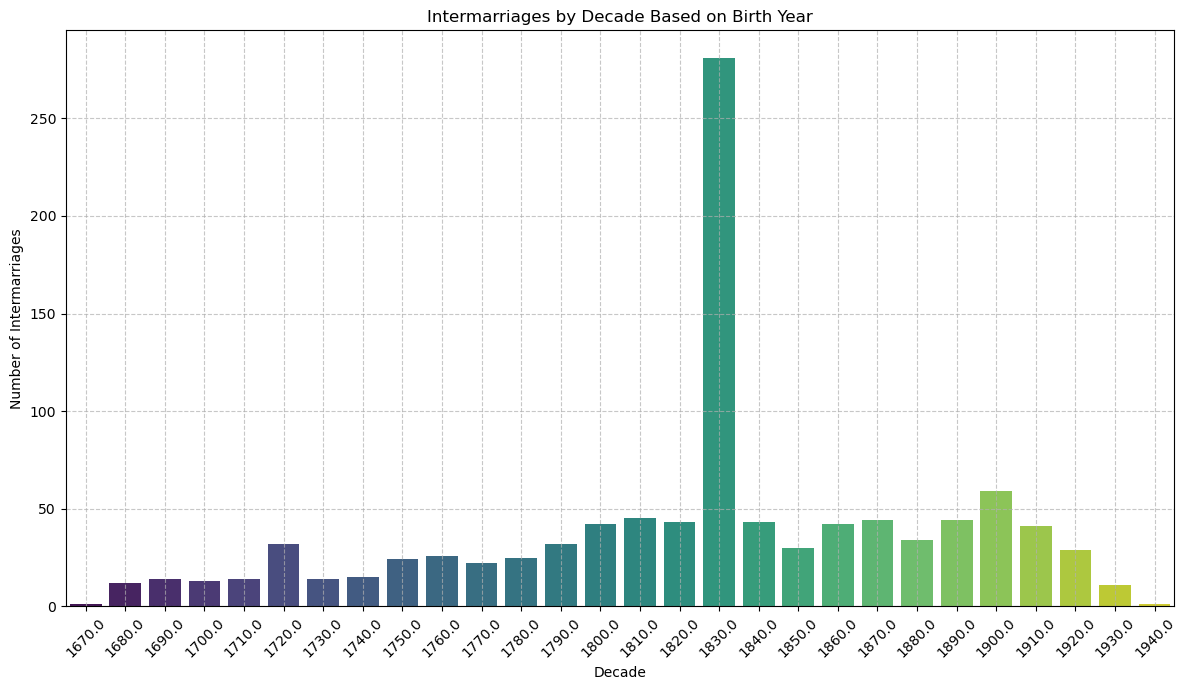

In [51]:
df_relevant['Decade'] = (df_relevant['Birth_Year'] // 10) * 10
decade_data = df_relevant[df_relevant['Intermarriage'] == 'Yes'].groupby('Decade').size()

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x=decade_data.index.astype(str), y=decade_data.values, palette='viridis')  # Changed palette to 'viridis' for a different look
plt.title('Intermarriages by Decade Based on Birth Year')
plt.xlabel('Decade')
plt.ylabel('Number of Intermarriages')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # Adjusted for better visual effect
plt.tight_layout()
plt.show()

In [52]:
from pyvis.network import Network
import pandas as pd
data = pd.read_excel('spouses_result.xlsx')  # Update the path to your file
net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")
for index, row in data.iterrows():
    person = row['Person']
    spouses = row['Spouse'].split(',')
    net.add_node(person, label=person, title=person)
    for spouse in spouses:
        spouse = spouse.strip()  # Remove leading/trailing whitespace
        net.add_node(spouse, label=spouse, title=spouse)
        net.add_edge(person, spouse)
net.toggle_physics(True)
net.show('interm_mapping.html')

interm_mapping.html


# Modelling

### Random Forest

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
categorical_features = ['Gender', 'Birth Place - Country', 'Residence_Country_Consolidated', 'Town_Frequency_Bin']
numerical_features = ['Birth_Year', 'Death_Year', 'Scaled_Age_Standard','Occupation_Cluster', 'Father_Occupation_Cluster']
encoder = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', 'passthrough', numerical_features)
])
X = encoder.fit_transform(df_relevant.drop('Intermarriage', axis=1))
y = LabelEncoder().fit_transform(df_relevant['Intermarriage'])  # Encoding the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'F1 Score': f1_score(y_test, y_pred, average='macro'),
    'ROC-AUC Score': roc_auc_score(y_test, y_pred)
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")


Accuracy: 0.95
Precision: 0.63
Recall: 0.51
F1 Score: 0.51
ROC-AUC Score: 0.51


### SMOTH Random Forest

In [54]:
from imblearn.over_sampling import SMOTE
categorical_features = ['Gender', 'Birth Place - Country', 'Residence_Country_Consolidated', 'Town_Frequency_Bin']
numerical_features = ['Birth_Year', 'Death_Year', 'Scaled_Age_Standard','Occupation_Cluster', 'Father_Occupation_Cluster']
encoder = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', 'passthrough', numerical_features)
])

X = encoder.fit_transform(df_relevant.drop('Intermarriage', axis=1))
y = LabelEncoder().fit_transform(df_relevant['Intermarriage'])  # Encoding the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rf_classifier_smote = RandomForestClassifier(random_state=42)
rf_classifier_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_classifier_smote.predict(X_test)
metrics_smote = {
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'Precision': precision_score(y_test, y_pred_smote, average='macro'),
    'Recall': recall_score(y_test, y_pred_smote, average='macro'),
    'F1 Score': f1_score(y_test, y_pred_smote, average='macro'),
    'ROC-AUC Score': roc_auc_score(y_test, y_pred_smote)
}
print("After SMOTE:")
for metric, value in metrics_smote.items():
    print(f"{metric}: {value:.2f}")
erformance_metrics_list_smote = list(metrics_smote.values())
print(performance_metrics_list_smote)

After SMOTE:
Accuracy: 0.94
Precision: 0.59
Recall: 0.53
F1 Score: 0.54
ROC-AUC Score: 0.53
[0.9411764705882353, 0.5853550248945549, 0.5294394312277824, 0.5391401109534254, 0.5294394312277824]


In [55]:
#pip install tensorflow

In [56]:
# Print all column names in the DataFrame
print(df_relevant.columns)

Index(['Gender', 'Birth_Year', 'Death_Year', 'Birth Place - Country',
       'Occupation', 'Father_Occupation', 'Residence_Town',
       'Residence_Country', 'No_of_Spouse', 'Spouse_Names', 'Age', 'Name',
       'Scaled_Age_MinMax', 'Scaled_Age_Standard',
       'Residence_Country_Consolidated', 'Town_Frequency_Bin',
       'Occupation_Cleaned', 'Occupation_Cluster', 'Father_Occupation_Cleaned',
       'Father_Occupation_Cluster', 'Intermarriage', 'Decade'],
      dtype='object')


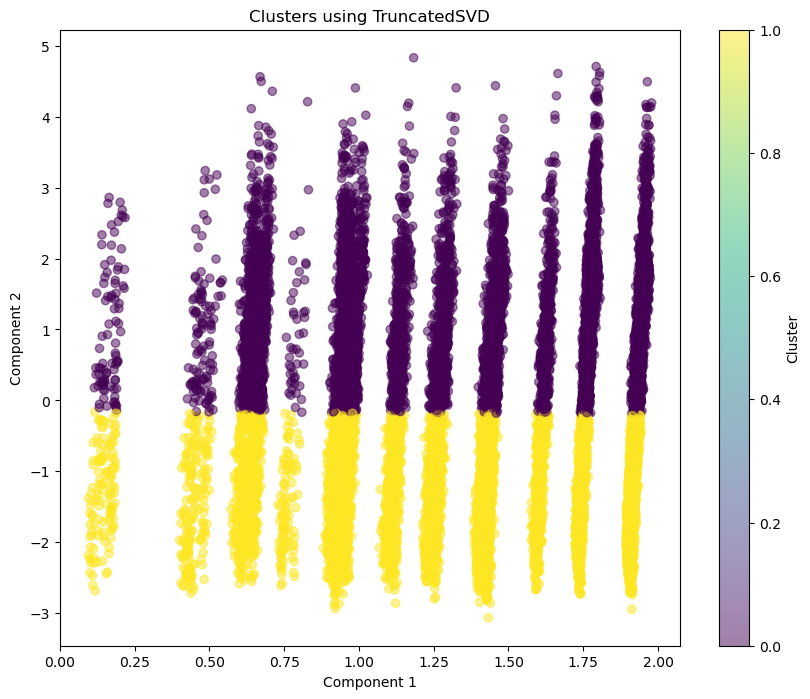

In [57]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.compose import ColumnTransformer
    from sklearn.decomposition import TruncatedSVD
    from sklearn.cluster import KMeans
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import silhouette_score

    categorical_features = ['Gender', 'Birth Place - Country', 'Residence_Country_Consolidated', 'Town_Frequency_Bin']
    numerical_features = ['Birth_Year', 'Death_Year', 'Scaled_Age_Standard', 'Occupation_Cluster', 'Father_Occupation_Cluster']
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features),
            ('num', StandardScaler(), numerical_features)  # Standardizing numerical features
        ])

    X_preprocessed = preprocessor.fit_transform(df_relevant.drop('Intermarriage', axis=1))
    svd = TruncatedSVD(n_components=2)
    X_svd = svd.fit_transform(X_preprocessed)
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_svd)
        silhouette_scores.append(silhouette_score(X_svd, cluster_labels))

    optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because range starts from 2
    kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_svd)
    plt.figure(figsize=(10, 8))
    plt.scatter(X_svd[:, 0], X_svd[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Clusters using TruncatedSVD')
    plt.colorbar(label='Cluster')
    plt.show()


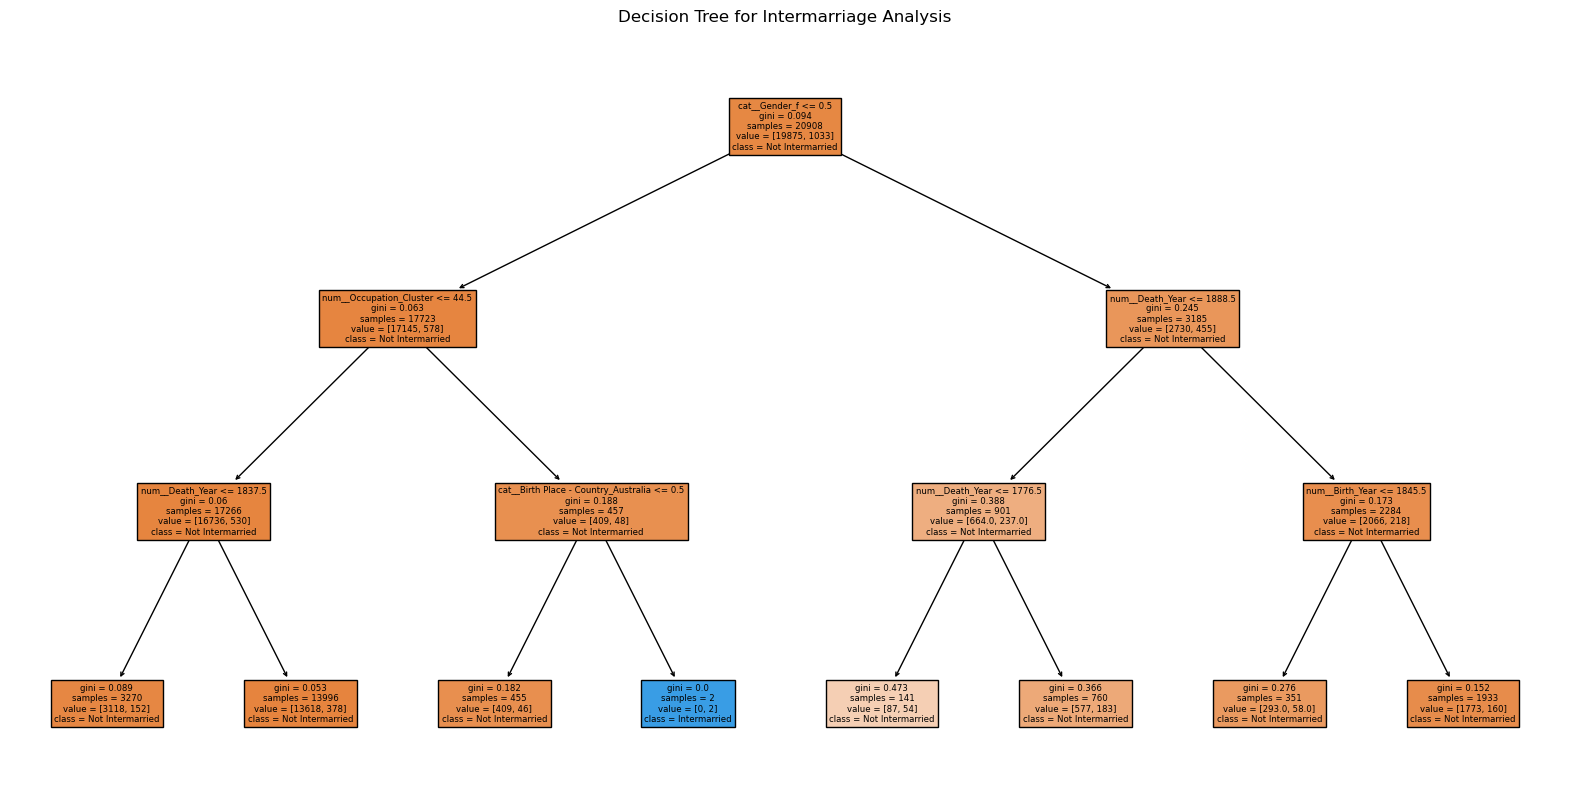

In [58]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

categorical_features = ['Gender', 'Birth Place - Country', 'Residence_Country_Consolidated', 'Town_Frequency_Bin']
numerical_features = ['Birth_Year', 'Death_Year', 'Scaled_Age_Standard', 'Occupation_Cluster', 'Father_Occupation_Cluster']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])
X = preprocessor.fit_transform(df_relevant.drop('Intermarriage', axis=1))
y = LabelEncoder().fit_transform(df_relevant['Intermarriage'])
dtree_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth to keep the tree interpretable
dtree_model.fit(X, y)
plt.figure(figsize=(20,10))
plot_tree(dtree_model, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=['Not Intermarried', 'Intermarried'])
plt.title('Decision Tree for Intermarriage Analysis')
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.95


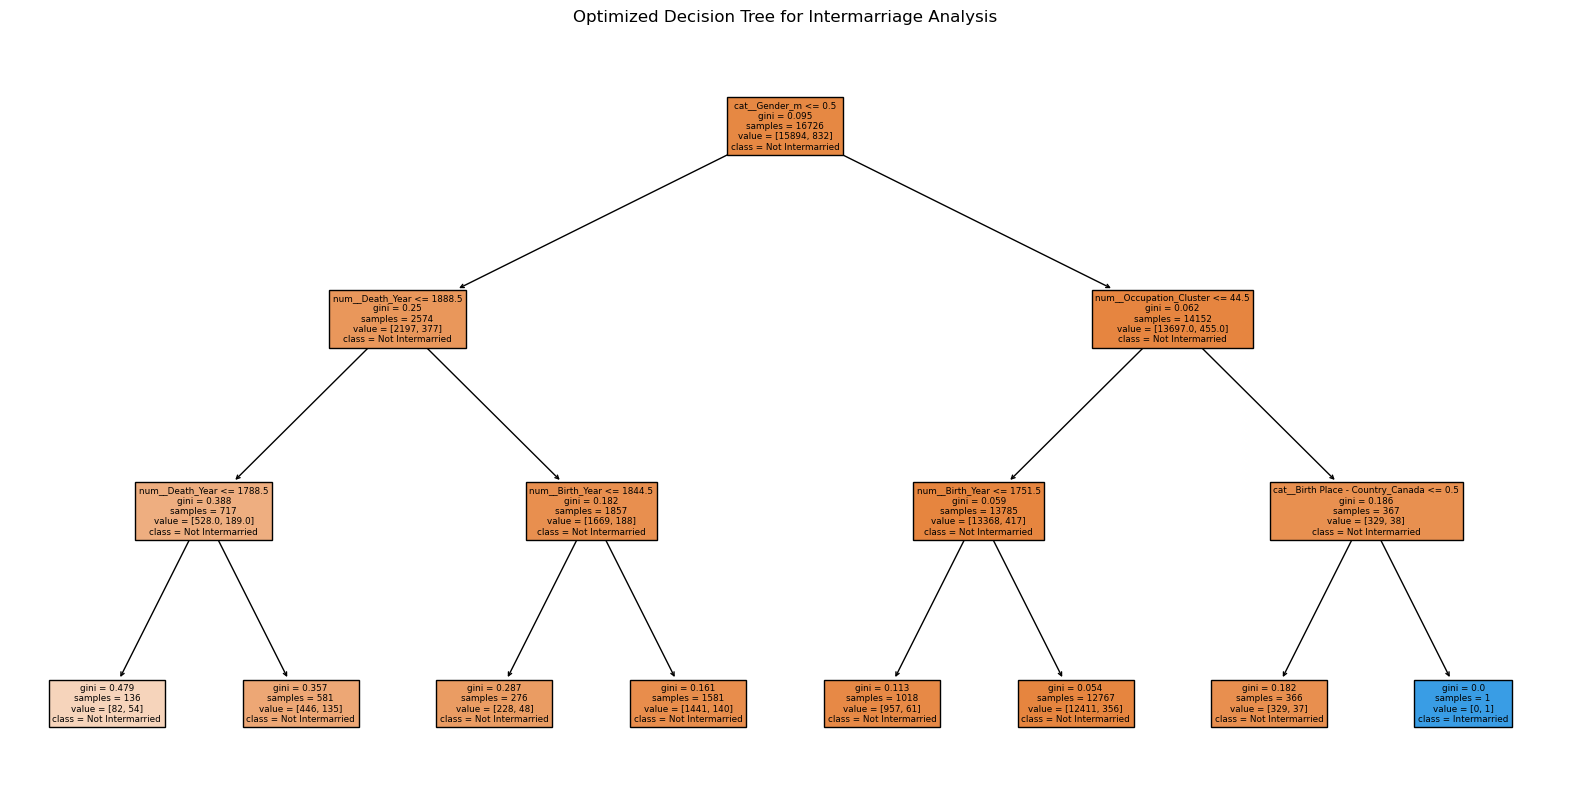

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import pandas as pd

categorical_features = ['Gender', 'Birth Place - Country', 'Residence_Country_Consolidated', 'Town_Frequency_Bin']
numerical_features = ['Birth_Year', 'Death_Year', 'Scaled_Age_Standard', 'Occupation_Cluster', 'Father_Occupation_Cluster']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])
X = preprocessor.fit_transform(df_relevant.drop('Intermarriage', axis=1))
y = LabelEncoder().fit_transform(df_relevant['Intermarriage'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_tree = grid_search.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=['Not Intermarried', 'Intermarried'])
plt.title('Optimized Decision Tree for Intermarriage Analysis')
plt.show()


# Evaluation

### Evaluation for Code 1: Random Forest with SMOTE:
Assess the performance of a Random Forest classifier trained on balanced data using SMOTE        


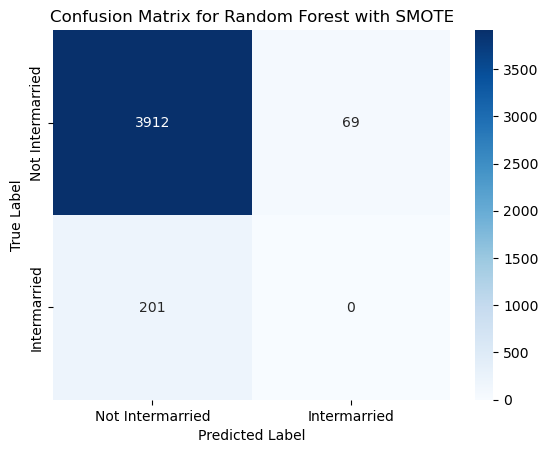

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3981
           1       0.00      0.00      0.00       201

    accuracy                           0.94      4182
   macro avg       0.48      0.49      0.48      4182
weighted avg       0.91      0.94      0.92      4182



In [60]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Intermarried', 'Intermarried'], yticklabels=['Not Intermarried', 'Intermarried'])
plt.title('Confusion Matrix for Random Forest with SMOTE')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report for detailed performance analysis
print(classification_report(y_test, y_pred_smote))


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve)
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np

# Assume df_relevant is your DataFrame loaded with relevant columns
# Preprocess the DataFrame
categorical_features = ['Gender', 'Birth Place - Country', 'Residence_Country_Consolidated', 'Town_Frequency_Bin']
numerical_features = ['Birth_Year', 'Death_Year', 'Scaled_Age_Standard','Occupation_Cluster', 'Father_Occupation_Cluster']

# Encoding features
encoder = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', 'passthrough', numerical_features)
])

X = encoder.fit_transform(df_relevant.drop('Intermarriage', axis=1))
y = LabelEncoder().fit_transform(df_relevant['Intermarriage'])  # Encoding the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Training RandomForestClassifier on the balanced training data
rf_classifier_smote = RandomForestClassifier(random_state=42)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred_smote = rf_classifier_smote.predict(X_test)

# Evaluating the model with SMOTE
metrics_smote = {
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'Precision': precision_score(y_test, y_pred_smote, average='macro'),
    'Recall': recall_score(y_test, y_pred_smote, average='macro'),
    'F1 Score': f1_score(y_test, y_pred_smote, average='macro'),
    'ROC-AUC Score': roc_auc_score(y_test, y_pred_smote)
}

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_smote)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_smote)

# Feature Importance
importances = rf_classifier_smote.feature_importances_
indices = np.argsort(importances)[::-1]
features = encoder.get_feature_names_out()
top_n = 5  # Number of top features to plot

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf_classifier_smote, X_train_smote, y_train_smote, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


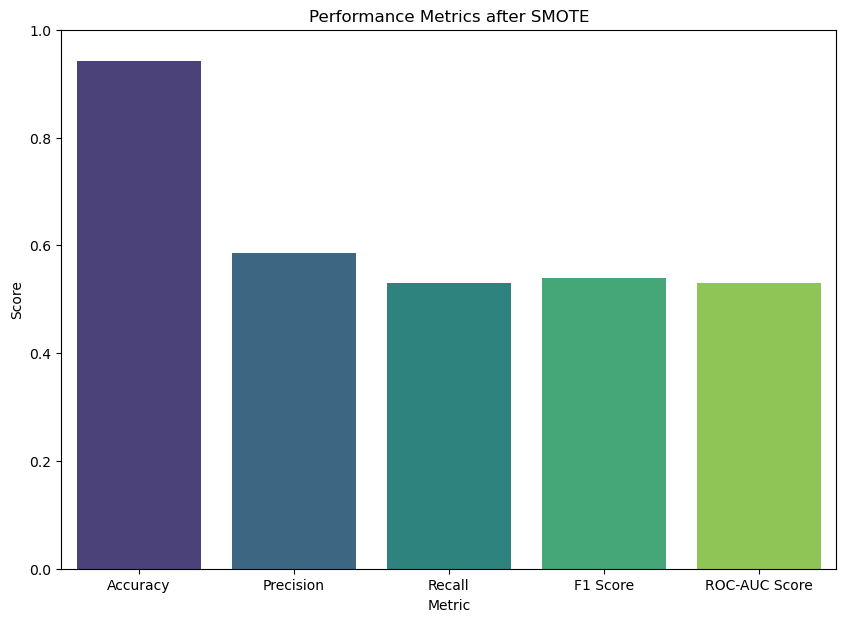

In [73]:
# Plotting the performance metrics
plt.figure(figsize=(10, 7))
sns.barplot(x=list(metrics_smote.keys()), y=list(metrics_smote.values()), palette="viridis")
plt.ylim(0, 1)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics after SMOTE')
plt.show()


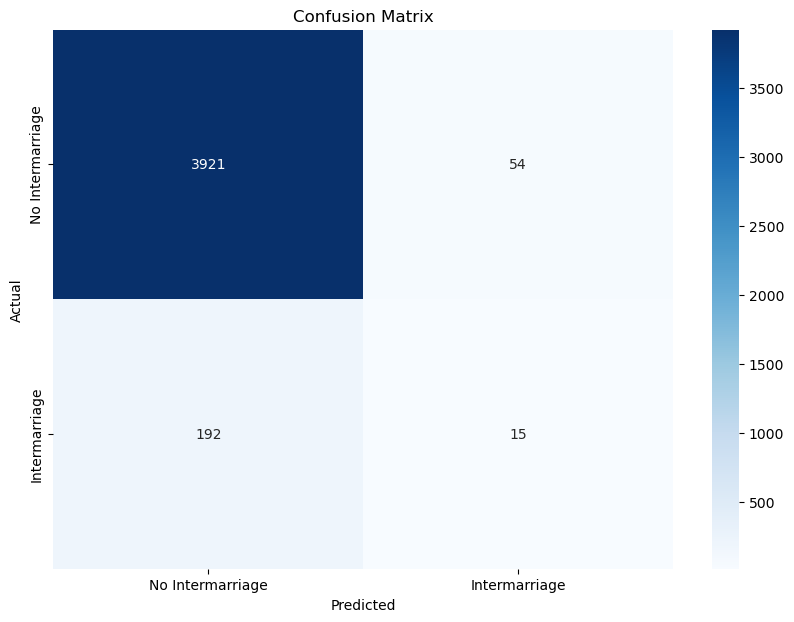

In [74]:
# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Intermarriage', 'Intermarriage'], yticklabels=['No Intermarriage', 'Intermarriage'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

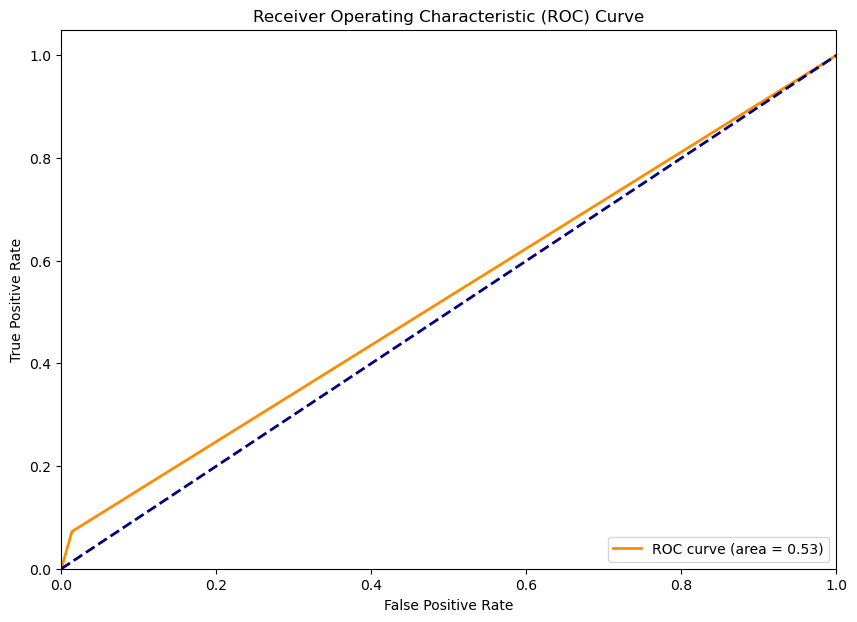

In [75]:
# ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


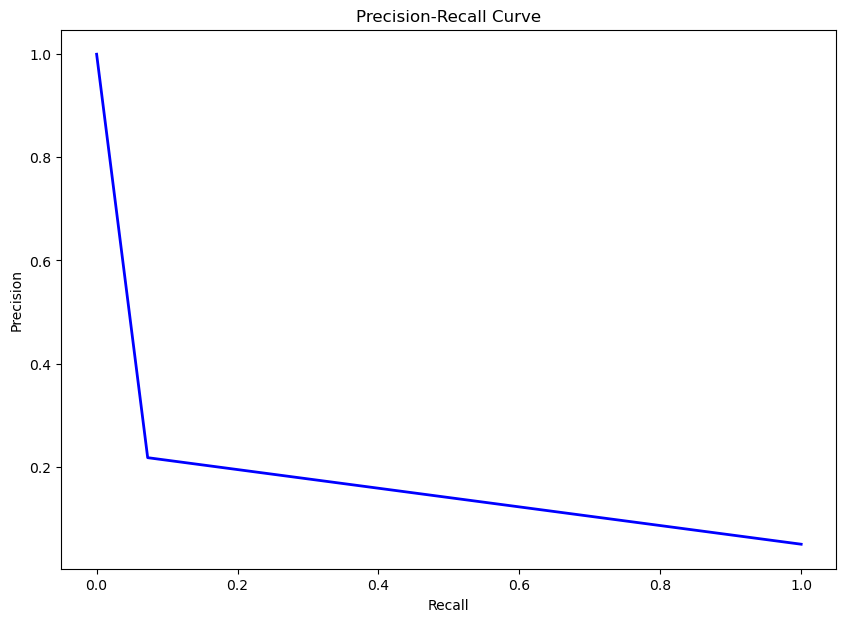

In [76]:
# Precision-Recall Curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


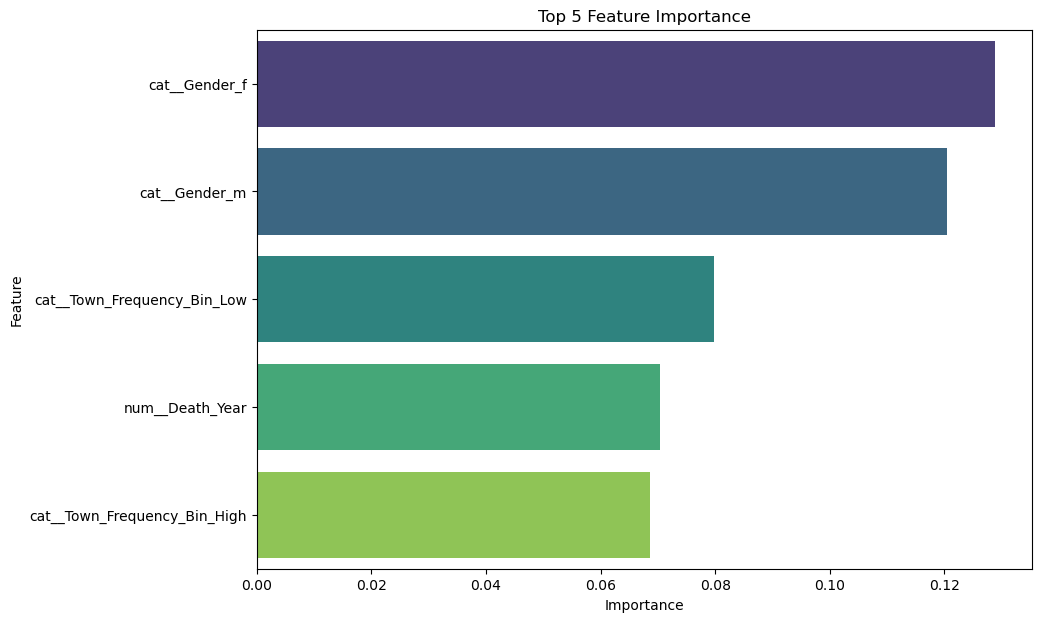

In [77]:
# Feature Importance Plot (Top 20 Features)
plt.figure(figsize=(10, 7))
sns.barplot(x=importances[indices][:top_n], y=[features[i] for i in indices][:top_n], palette="viridis")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importance')
plt.show()


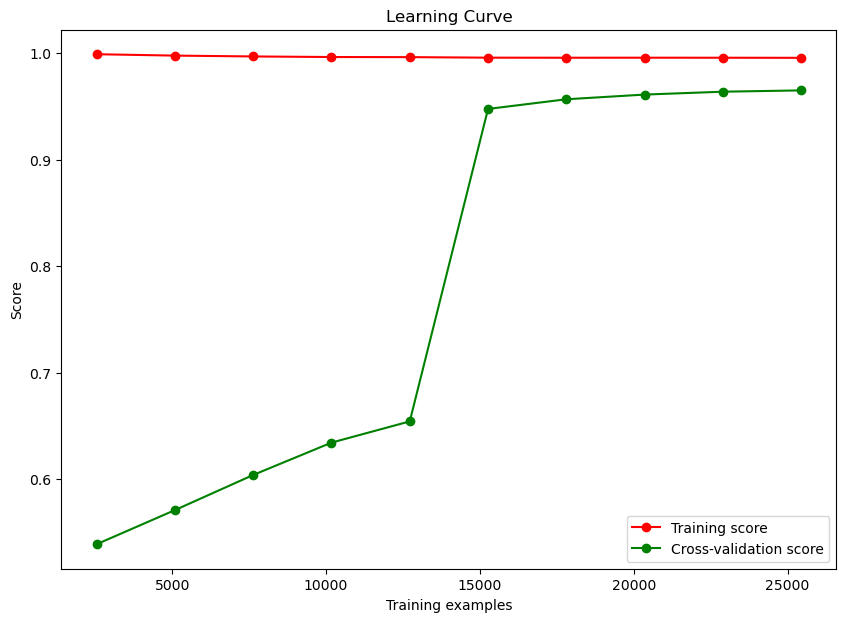

In [78]:
# Learning Curve
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


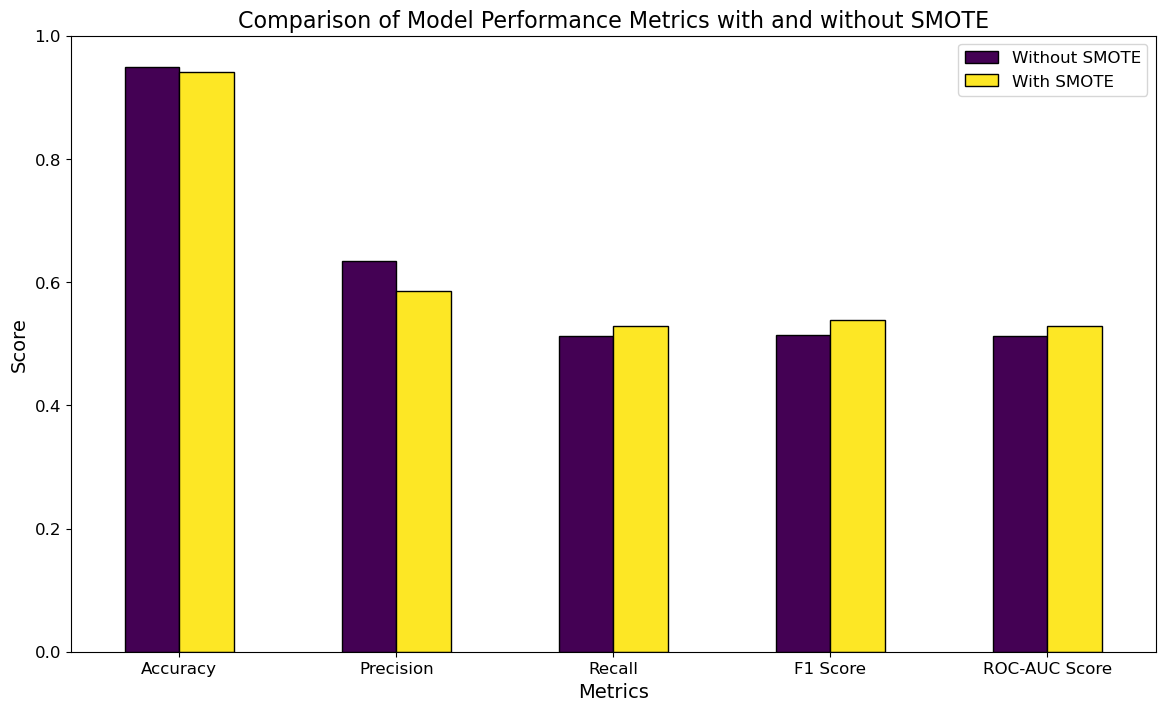

In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assume df_relevant is your DataFrame loaded with relevant columns
# Preprocess the DataFrame
categorical_features = ['Gender', 'Birth Place - Country', 'Residence_Country_Consolidated', 'Town_Frequency_Bin']
numerical_features = ['Birth_Year', 'Death_Year', 'Scaled_Age_Standard','Occupation_Cluster', 'Father_Occupation_Cluster']

# Encoding features
encoder = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', 'passthrough', numerical_features)
])

X = encoder.fit_transform(df_relevant.drop('Intermarriage', axis=1))
y = LabelEncoder().fit_transform(df_relevant['Intermarriage'])  # Encoding the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training RandomForestClassifier on the imbalanced training data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set without SMOTE
y_pred = rf_classifier.predict(X_test)

# Evaluating the model without SMOTE
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'F1 Score': f1_score(y_test, y_pred, average='macro'),
    'ROC-AUC Score': roc_auc_score(y_test, y_pred)
}

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Training RandomForestClassifier on the balanced training data
rf_classifier_smote = RandomForestClassifier(random_state=42)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Predicting on the test set with SMOTE
y_pred_smote = rf_classifier_smote.predict(X_test)

# Evaluating the model with SMOTE
metrics_smote = {
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'Precision': precision_score(y_test, y_pred_smote, average='macro'),
    'Recall': recall_score(y_test, y_pred_smote, average='macro'),
    'F1 Score': f1_score(y_test, y_pred_smote, average='macro'),
    'ROC-AUC Score': roc_auc_score(y_test, y_pred_smote)
}

# Creating the comparison plot
metrics_df = pd.DataFrame({
    'Without SMOTE': list(metrics.values()),
    'With SMOTE': list(metrics_smote.values())
}, index=metrics.keys())

metrics_df.plot(kind='bar', figsize=(14, 8), colormap='viridis', edgecolor='black')
plt.ylim(0, 1)
plt.title('Comparison of Model Performance Metrics with and without SMOTE', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.show()


### Evaluation for Code 2: K-Means Clustering
Evaluate the clustering quality using the silhouette score and visually inspect the cluster distribution.

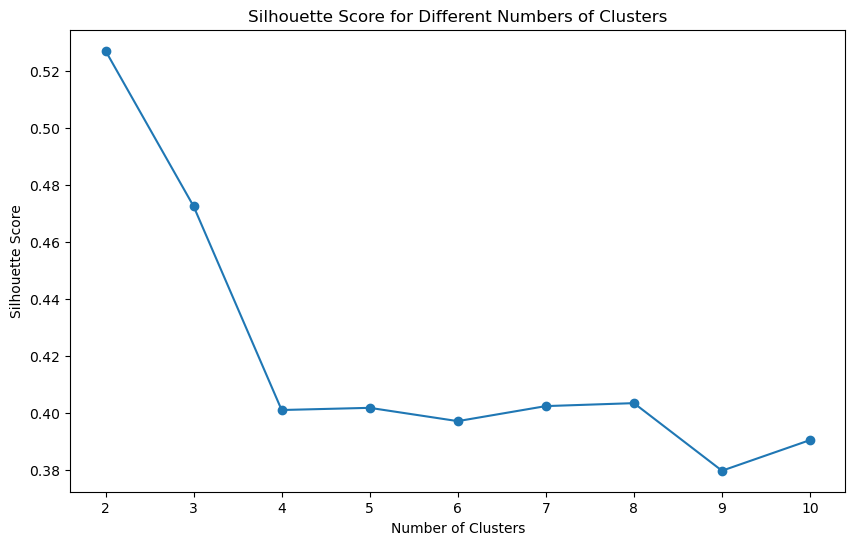

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_svd)
    score = silhouette_score(X_svd, cluster_labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()


### Evaluation for Code 3: Decision Tree with GridSearchCV
Evaluate the optimized decision tree's structure and parameters with a visual and detailed performance metrics.

Accuracy Score: 0.95


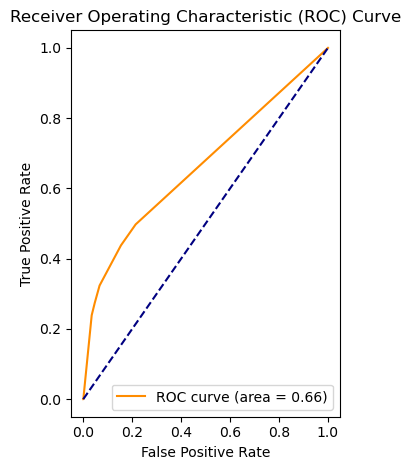

In [62]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
acc_score = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))
# Display performance scores
print(f"Accuracy Score: {acc_score:.2f}")

# Calculate the ROC curve and AUC
y_scores = best_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# Deployment